# EDA: Deciding transformation methods. 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
import importlib
import sys 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../")

from proj_mod import visualization, data_processing
importlib.reload(visualization);
importlib.reload(data_processing);

In [3]:
df=pd.read_csv("../data/raw.csv")

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [5]:
len(df)

40000

In [6]:
len(df[df["y"]=="yes"])

2896

In [7]:
len(df[df["y"]=="yes"])/len(df)

0.0724

Having "yes" and "no" is annoying. Changing it to 1 and 0. 

In [8]:
df["y"]=df["y"].map({"yes":1, "no":0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,0
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,1
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,0


In [36]:
fall_back=df["y"].mean()
fall_back

np.float64(0.0724)

We keep df_ready as an example of the data that is ready for use. 

In [10]:
df_ready=df[["y"]]
df_ready

,y
0,0
1,0
2,0
3,0
4,0
...,...
39995,0
39996,1
39997,1
39998,0


This is the defining example of unbalanced dataset. Only 7.24% has positive target. 

There are three types of raw input: numeric, categorical, and binary. We will need different ways to analysis each of them. We will, first, go through all features one by one, then, we will use mutual information and f score to evaluate the features "globally". 

## Age (numeric) 

In [11]:
df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81])

In [12]:
len(df["age"].unique())

70

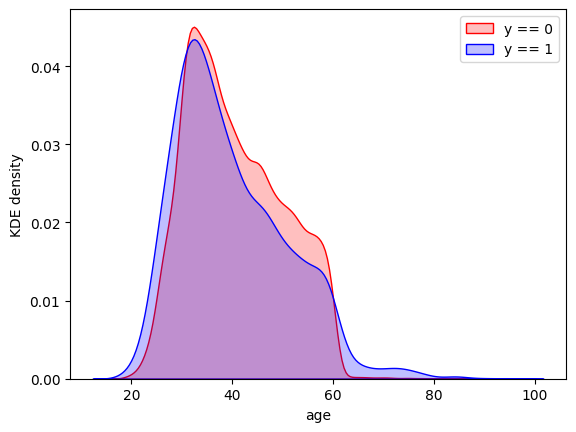

In [13]:
visualization.sns_kde(df=df,feature="age")

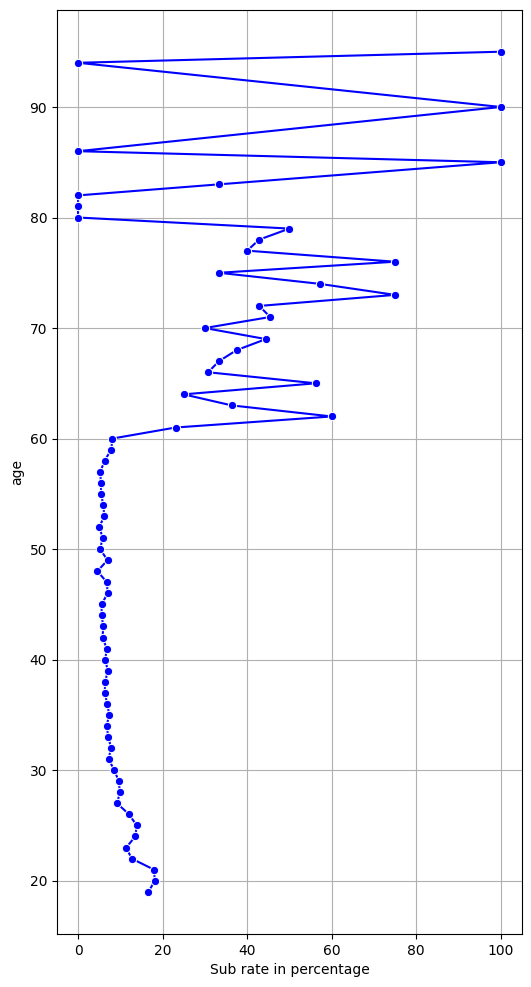

In [14]:
visualization.yes_pct(df=df,feature="age")

It is almost like old people have too much money. 

When using this value in practice, I would apply the StandardScaler first. 

In [15]:
df_ready["age"]=df["age"]
df_ready

/tmp/ipykernel_15253/1766158338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready["age"]=df["age"]


,y,age
0,0,58
1,0,44
2,0,33
3,0,47
4,0,33
...,...,...
39995,0,53
39996,1,30
39997,1,54
39998,0,34


Target encoding: 

In [34]:
yes_pct_df=data_processing.get_pct_group_by(df=df[["age","y"]],groupby="age")
yes_pct_df

,age,y,count
0,19,16.666667,12
1,20,18.181818,22
2,21,17.948718,39
3,22,12.676056,71
4,23,11.409396,149
...,...,...,...
65,85,100.000000,3
66,86,0.000000,1
67,90,100.000000,1
68,94,0.000000,1


In [ ]:
yes_pct_df=data_processing.get_pct_group_by(df=df[["age","y"]],groupby="age")
df_ready["age_tar"]=data_processing.map_fill_w_knn(feature_arr=df["age"].to_numpy(), cat_arr=yes_pct_df["age"].to_numpy(), val_arr=yes_pct_df["y"].to_numpy(), count_arr=np.log(yes_pct_df["count"].to_numpy()+1))
df_ready

/tmp/ipykernel_15253/1725441998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready["age_tar"]=data_processing.map_fill_w_knn(feature_arr=df["age"].to_numpy(), cat_arr=yes_pct_df["age"].to_numpy(), val_arr=yes_pct_df["y"].to_numpy(), count_arr=np.log(yes_pct_df["count"].to_numpy()+1))


,y,age,age_tar
0,0,58,7.659174
1,0,44,6.252218
2,0,33,7.665756
3,0,47,5.969079
4,0,33,7.665756
...,...,...,...
39995,0,53,5.766354
39996,1,30,8.872931
39997,1,54,5.552559
39998,0,34,7.268098


In [18]:
df_ready_age=(df_ready.groupby("age")["y"].mean()*100).reset_index()
df_ready_age=df_ready_age.merge(right=df_ready[["age","age_tar"]], left_on="age", right_on="age", how="left").drop_duplicates()
df_ready_age

,age,y,age_tar
0,19,16.666667,14.000389
12,20,18.181818,14.000389
34,21,17.948718,14.000389
73,22,12.676056,14.000389
144,23,11.409396,14.000389
...,...,...,...
39993,85,100.000000,31.759879
39996,86,0.000000,41.802631
39997,90,100.000000,41.802631
39998,94,0.000000,41.802631


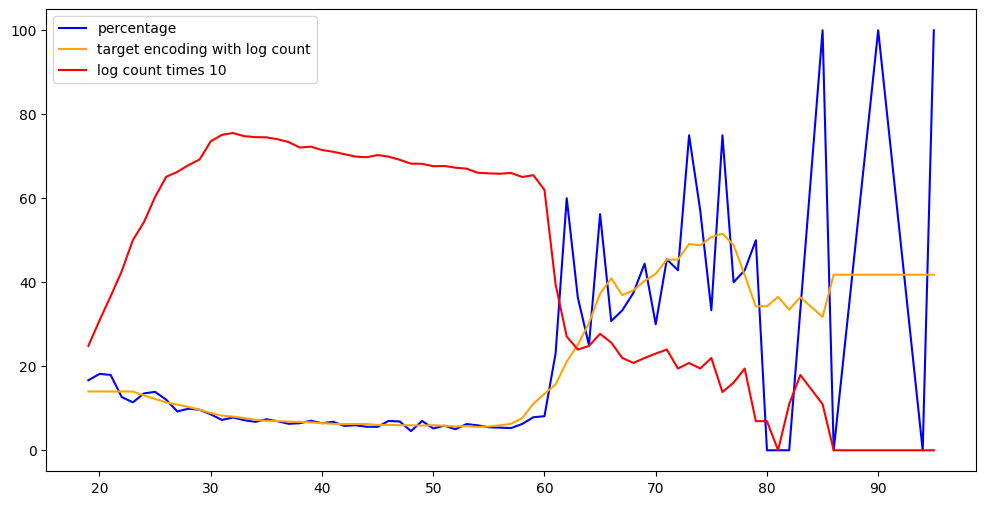

In [19]:
fig, ax=plt.subplots(1,1, figsize=(12,6))
sns.lineplot(x=df_ready_age["age"].values, y=df_ready_age["y"].values, color="blue", markers=True, label="percentage", ax=ax)
sns.lineplot(x=df_ready_age["age"].values, y=df_ready_age["age_tar"].values, color="orange", markers=True, label="target encoding with log count", ax=ax)
sns.lineplot(x=yes_pct_df["age"].values, y=np.log(yes_pct_df["count"].values)*10, color="red", markers=True, label="log count times 10", ax=ax)
plt.show()

## Job (categorical) 

In [20]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [21]:
len(df["job"].unique())

12

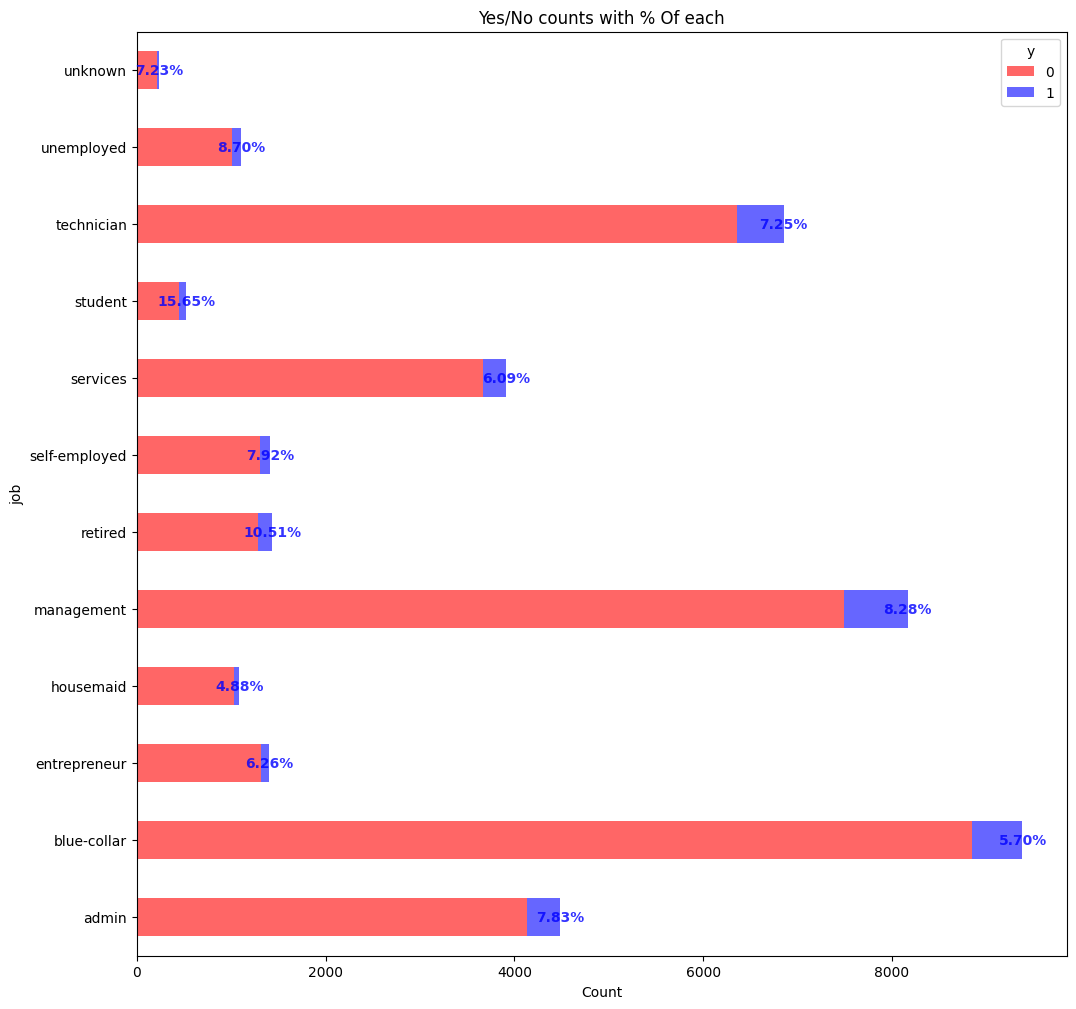

In [22]:
visualization.barh_pct(df=df,feature="job")

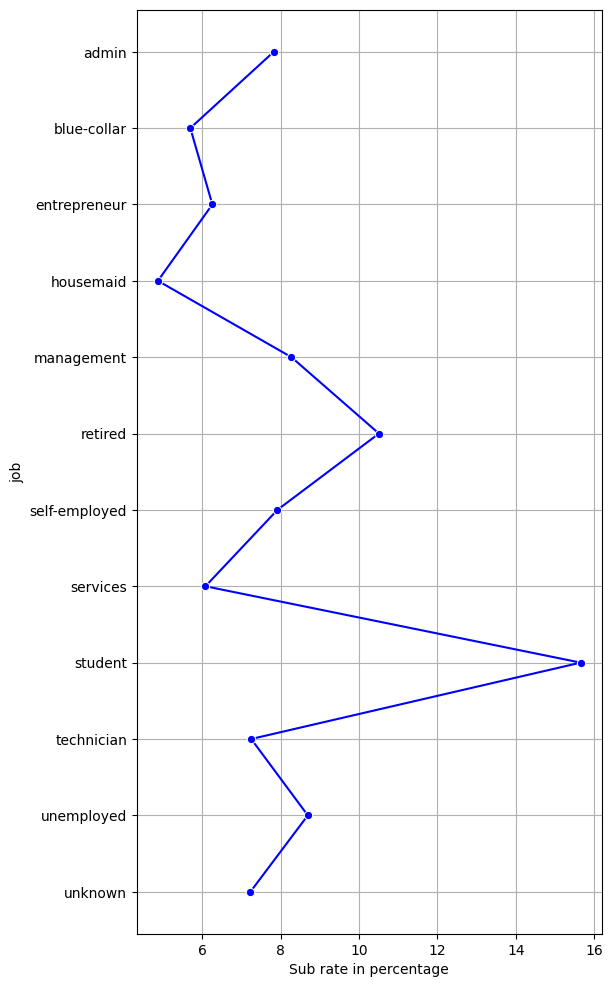

In [23]:
visualization.yes_pct(df=df, feature="job")

In practice, I will apply one-hot encoder first: 

In [30]:
ohencoder=OneHotEncoder(handle_unknown="ignore")
df_encoded=pd.DataFrame(
    ohencoder.fit_transform(X=df[["job"]]).toarray(),
    columns=ohencoder.get_feature_names_out(["job"])
)
df_ready=pd.concat([df_ready,df_encoded],axis=1)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Target encoding: 

In [37]:
tar=data_processing.get_pct_group_by(df=df[["job","y"]],groupby="job")
df_ready["job_tar"]=data_processing.map_fill_fall_back(feature_arr=df["job"].to_numpy(), cat_arr=tar["job"].to_numpy(), val_arr=tar["y"].to_numpy(), fall_back=fall_back)
# df_ready["job_tar"]=df["job"].transform(lambda x: data_processing.safe_return(x, tar))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,job_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.278227
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.253357
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.263345
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.701801
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.234043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.253357
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.278227
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.829578
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.278227


## Marital (categorical) 

In [38]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

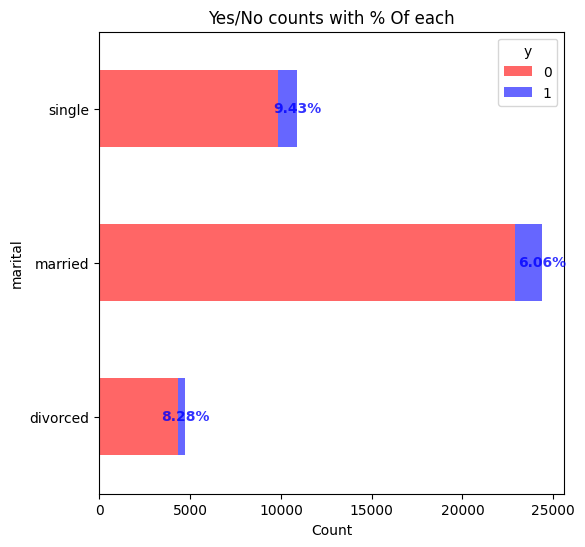

In [39]:
visualization.barh_pct(df=df,feature="marital",figsize=(6,6))

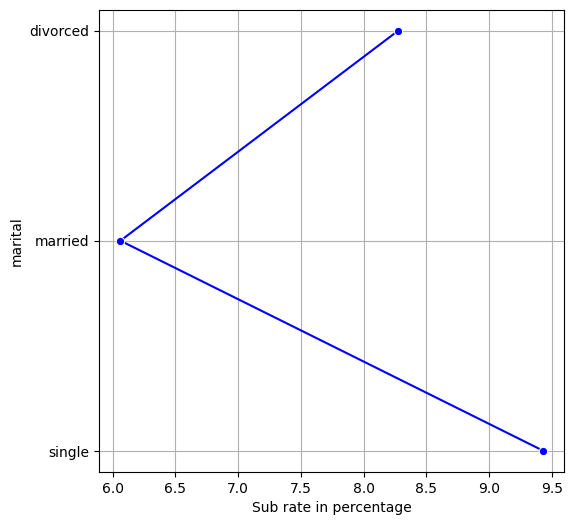

In [40]:
visualization.yes_pct(df=df, feature="marital", figsize=(6,6))

Again, one hot encoder first: 

In [41]:
ohencoder=OneHotEncoder(handle_unknown="ignore")
df_encoded=pd.DataFrame(
    ohencoder.fit_transform(X=df[["marital"]]).toarray(),
    columns=ohencoder.get_feature_names_out(["marital"])
)
df_ready=pd.concat([df_ready,df_encoded],axis=1)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,job_tar,marital_divorced,marital_married,marital_single
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.278227,0.0,1.0,0.0
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,7.253357,0.0,0.0,1.0
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.263345,0.0,1.0,0.0
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.701801,0.0,1.0,0.0
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,7.234043,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,7.253357,0.0,1.0,0.0
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.278227,0.0,0.0,1.0
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.829578,1.0,0.0,0.0
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.278227,0.0,1.0,0.0


Target encoding:

In [42]:
tar=data_processing.get_pct_group_by(df=df[["marital","y"]],groupby="marital")
df_ready["marital_tar"]=data_processing.map_fill_fall_back(feature_arr=df["marital"].to_numpy(), cat_arr=tar["marital"].to_numpy(), val_arr=tar["y"].to_numpy(), fall_back=fall_back)
# df_ready["job_tar"]=df["job"].transform(lambda x: data_processing.safe_return(x, tar))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_services,job_student,job_technician,job_unemployed,job_unknown,job_tar,marital_divorced,marital_married,marital_single,marital_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.278227,0.0,1.0,0.0,6.060855
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,7.253357,0.0,0.0,1.0,9.431536
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.263345,0.0,1.0,0.0,6.060855
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.701801,0.0,1.0,0.0,6.060855
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,7.234043,0.0,0.0,1.0,9.431536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,7.253357,0.0,1.0,0.0,6.060855
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.278227,0.0,0.0,1.0,9.431536
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.829578,1.0,0.0,0.0,8.275132
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.278227,0.0,1.0,0.0,6.060855


## Education (categorical, ordinal) 

In [43]:
df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

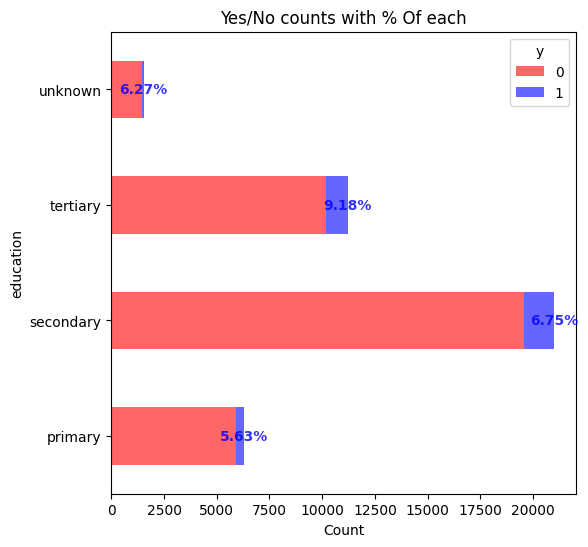

In [44]:
visualization.barh_pct(df=df, feature="education", figsize=(6,6))

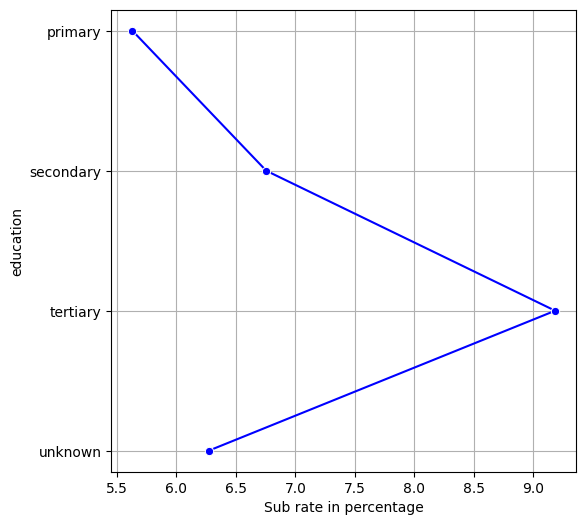

In [45]:
visualization.yes_pct(df=df, feature="education", figsize=(6,6))

Here, there is ordinal nature to the data, we will use ordinal encoding. It is natural to put to "tertiary>secondary>primary", but it is unclear where to place "unknown". 
I consider it is more sensible to put is between "primary" and "secondary": 

* The sub rate of "unknown" is between those two. 
* "unknown" can be understood as "assume the average", so I think it makes sense to put it somewhere in the middle. 

In [46]:
df_ready["education_ord"]=df["education"].map({"primary":0, "unknown": 1, "secondary": 2, "tertiary": 3})
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_student,job_technician,job_unemployed,job_unknown,job_tar,marital_divorced,marital_married,marital_single,marital_tar,education_ord
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.278227,0.0,1.0,0.0,6.060855,3
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,7.253357,0.0,0.0,1.0,9.431536,2
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.263345,0.0,1.0,0.0,6.060855,2
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.701801,0.0,1.0,0.0,6.060855,1
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,7.234043,0.0,0.0,1.0,9.431536,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,7.253357,0.0,1.0,0.0,6.060855,3
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.278227,0.0,0.0,1.0,9.431536,3
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.829578,1.0,0.0,0.0,8.275132,2
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.278227,0.0,1.0,0.0,6.060855,3


Again, consider target embedding: 

In [47]:
cur_feat="education"
tar=data_processing.get_pct_group_by(df=df[[cur_feat,"y"]],groupby=cur_feat)
df_ready[cur_feat+"_tar"]=data_processing.map_fill_fall_back(feature_arr=df[cur_feat].to_numpy(), cat_arr=tar[cur_feat].to_numpy(), val_arr=tar["y"].to_numpy(), fall_back=fall_back)
# df_ready["job_tar"]=df["job"].transform(lambda x: data_processing.safe_return(x, tar))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_technician,job_unemployed,job_unknown,job_tar,marital_divorced,marital_married,marital_single,marital_tar,education_ord,education_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,8.278227,0.0,1.0,0.0,6.060855,3,9.182581
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,7.253357,0.0,0.0,1.0,9.431536,2,6.754632
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.263345,0.0,1.0,0.0,6.060855,2,6.754632
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.701801,0.0,1.0,0.0,6.060855,1,6.270411
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,7.234043,0.0,0.0,1.0,9.431536,1,6.270411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,7.253357,0.0,1.0,0.0,6.060855,3,9.182581
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,8.278227,0.0,0.0,1.0,9.431536,3,9.182581
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.829578,1.0,0.0,0.0,8.275132,2,6.754632
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,8.278227,0.0,1.0,0.0,6.060855,3,9.182581


## Default (binary)

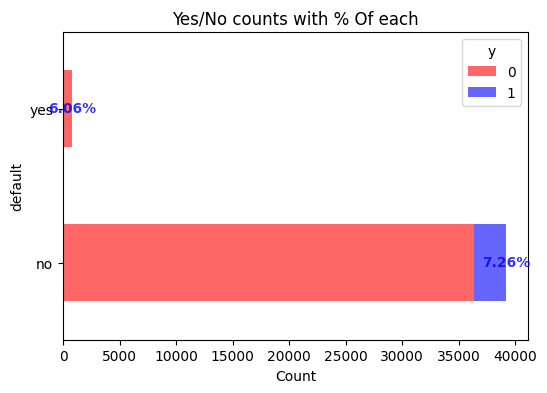

In [48]:
visualization.barh_pct(df=df, feature="default", figsize=(6,4))

One hot first: 

In [49]:
cur_feat="default"
ohencoder=OneHotEncoder(handle_unknown="ignore")
df_encoded=pd.DataFrame(
    ohencoder.fit_transform(X=df[[cur_feat]]).toarray(),
    columns=ohencoder.get_feature_names_out([cur_feat])
)
df_ready=pd.concat([df_ready,df_encoded],axis=1)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unknown,job_tar,marital_divorced,marital_married,marital_single,marital_tar,education_ord,education_tar,default_no,default_yes
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,8.278227,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.253357,0.0,0.0,1.0,9.431536,2,6.754632,1.0,0.0
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6.263345,0.0,1.0,0.0,6.060855,2,6.754632,1.0,0.0
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.701801,0.0,1.0,0.0,6.060855,1,6.270411,1.0,0.0
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.234043,0.0,0.0,1.0,9.431536,1,6.270411,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.253357,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,8.278227,0.0,0.0,1.0,9.431536,3,9.182581,1.0,0.0
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.829578,1.0,0.0,0.0,8.275132,2,6.754632,1.0,0.0
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,8.278227,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0


Target: 

In [50]:
cur_feat="default"
tar=data_processing.get_pct_group_by(df=df[[cur_feat,"y"]],groupby=cur_feat)
df_ready[cur_feat+"_tar"]=data_processing.map_fill_fall_back(feature_arr=df[cur_feat].to_numpy(), cat_arr=tar[cur_feat].to_numpy(), val_arr=tar["y"].to_numpy(), fall_back=fall_back)
# df_ready["job_tar"]=df["job"].transform(lambda x: data_processing.safe_return(x, tar))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_tar,marital_divorced,marital_married,marital_single,marital_tar,education_ord,education_tar,default_no,default_yes,default_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.278227,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.253357,0.0,0.0,1.0,9.431536,2,6.754632,1.0,0.0,7.264423
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.263345,0.0,1.0,0.0,6.060855,2,6.754632,1.0,0.0,7.264423
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.701801,0.0,1.0,0.0,6.060855,1,6.270411,1.0,0.0,7.264423
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.234043,0.0,0.0,1.0,9.431536,1,6.270411,1.0,0.0,7.264423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.253357,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.278227,0.0,0.0,1.0,9.431536,3,9.182581,1.0,0.0,7.264423
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.829578,1.0,0.0,0.0,8.275132,2,6.754632,1.0,0.0,7.264423
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.278227,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423


## Balance (numeric)

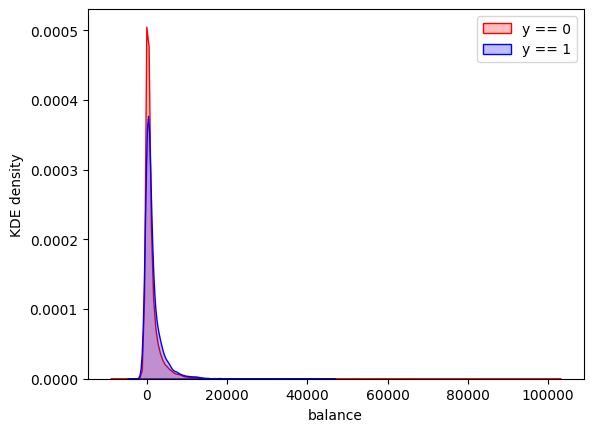

In [51]:
visualization.sns_kde(df=df, feature="balance")

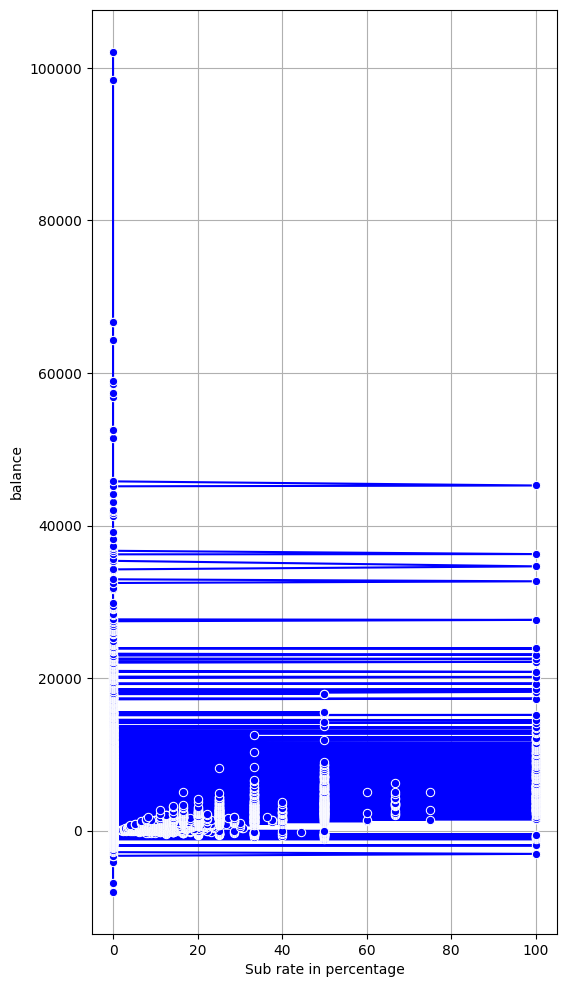

In [52]:
visualization.yes_pct(df=df, feature="balance")

Extremely long tail, should use something to shrink it a little, I think log is a good choice, need to be careful about sign tho. I will add a StandardScaler as well for the sake of it. 

In [54]:
# scaler=StandardScaler()
eps=0.1

# df_ready["balance_ready"]=scaler.fit_transform(pd.DataFrame({"balance": np.sign(df["balance"]+1)*np.log((df["balance"]+1).abs()+eps)}))
df_ready["balance_ready"]=pd.DataFrame({"balance": np.sign(df["balance"]+1)*np.log((df["balance"]+1).abs()+eps)})
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_divorced,marital_married,marital_single,marital_tar,education_ord,education_tar,default_no,default_yes,default_tar,balance_ready
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423,7.670475
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.431536,2,6.754632,1.0,0.0,7.264423,3.404525
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,6.060855,2,6.754632,1.0,0.0,7.264423,1.131402
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,6.060855,1,6.270411,1.0,0.0,7.264423,7.317943
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.431536,1,6.270411,1.0,0.0,7.264423,0.741937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423,5.981667
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,9.431536,3,9.182581,1.0,0.0,7.264423,8.114055
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,8.275132,2,6.754632,1.0,0.0,7.264423,5.303802
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423,6.954734


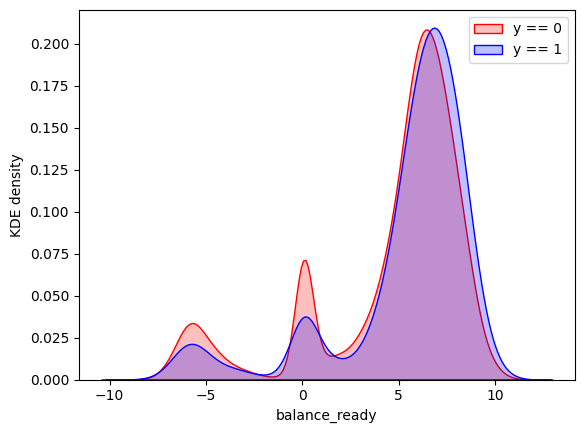

In [55]:
visualization.sns_kde(df=df_ready,feature="balance_ready") 

Target encoding: 

In [69]:
cur_feat="balance"
df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready","y"]],groupby=cur_feat+"_ready")
df_ready[cur_feat+"_tar"]=data_processing.map_fill_w_knn(feature_arr=df_ready[cur_feat+"_ready"].to_numpy(), cat_arr=df_ready_feat[cur_feat+"_ready"].to_numpy(), val_arr=df_ready_feat["y"].to_numpy(), count_arr=np.log(df_ready_feat["count"].to_numpy()+1))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_married,marital_single,marital_tar,education_ord,education_tar,default_no,default_yes,default_tar,balance_ready,balance_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423,7.670475,9.597768
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,9.431536,2,6.754632,1.0,0.0,7.264423,3.404525,5.423260
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,6.060855,2,6.754632,1.0,0.0,7.264423,1.131402,5.575723
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,6.060855,1,6.270411,1.0,0.0,7.264423,7.317943,7.965275
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,9.431536,1,6.270411,1.0,0.0,7.264423,0.741937,5.683893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423,5.981667,6.878299
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,9.431536,3,9.182581,1.0,0.0,7.264423,8.114055,13.699589
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.275132,2,6.754632,1.0,0.0,7.264423,5.303802,6.261347
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,6.060855,3,9.182581,1.0,0.0,7.264423,6.954734,7.757697


In [70]:
cur_feat="balance"
# df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready", "y"]], groupby=cur_feat+"_ready")  #(df_ready.groupby(cur_feat+"_ready")["y"].mean()*100).reset_index()
df_ready_feat=df_ready_feat.merge(right=df_ready[[cur_feat+"_ready",cur_feat+"_tar"]], left_on=cur_feat+"_ready", right_on=cur_feat+"_ready", how="left").drop_duplicates()
df_ready_feat

,balance_ready,y,count,balance_tar
0,-8.989457,0.0,1,2.311877
1,-8.831434,0.0,1,2.311877
2,-8.307977,0.0,1,2.311877
3,-8.122994,0.0,1,2.311877
4,-8.105338,0.0,1,2.311877
...,...,...,...,...
39995,11.072001,0.0,1,7.700830
39996,11.107272,0.0,1,7.700830
39997,11.108292,0.0,1,7.700830
39998,11.496980,0.0,1,7.700830


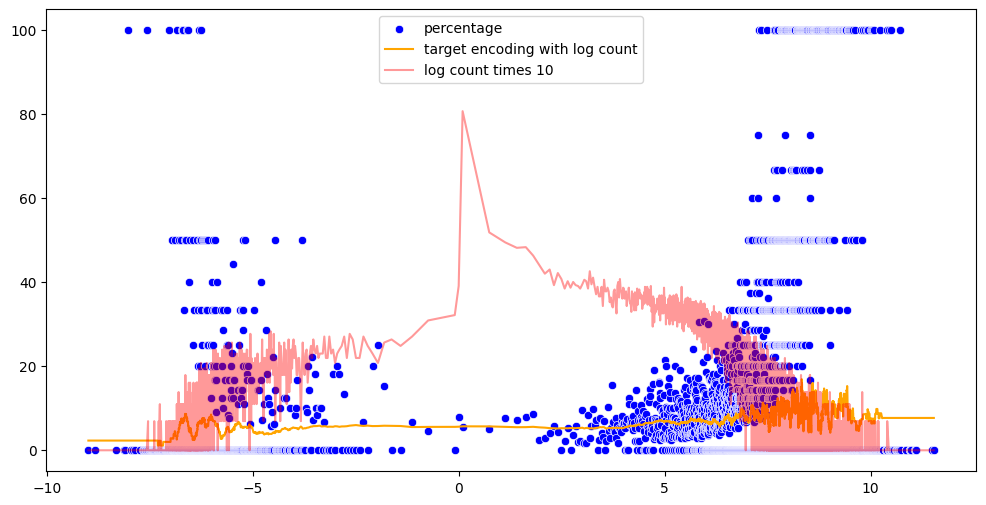

In [74]:
cur_feat="balance"
fig, ax=plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=df_ready_feat[cur_feat+"_ready"].values, y=df_ready_feat["y"].values, color="blue", markers=True, label="percentage", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat+"_ready"].values, y=df_ready_feat[cur_feat+"_tar"].values, color="orange", markers=True, label="target encoding with log count", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat+"_ready"].values, y=np.log(df_ready_feat["count"].values)*10, color="red", markers=True, label="log count times 10", ax=ax, alpha=0.4)
plt.show()

## Housing (binary) 

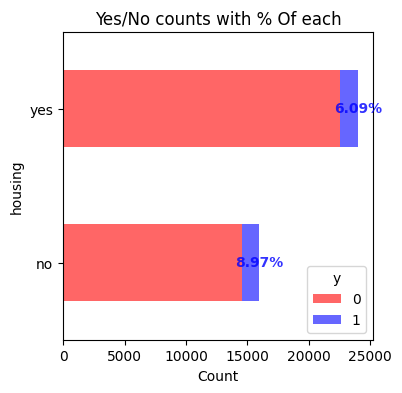

In [75]:
visualization.barh_pct(df=df, feature="housing", figsize=(4,4))

One hot encoding: 

In [76]:
cur_feat="housing"
ohencoder=OneHotEncoder(handle_unknown="ignore")
df_encoded=pd.DataFrame(
    ohencoder.fit_transform(X=df[[cur_feat]]).toarray(),
    columns=ohencoder.get_feature_names_out([cur_feat])
)
df_ready=pd.concat([df_ready,df_encoded],axis=1)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_tar,education_ord,education_tar,default_no,default_yes,default_tar,balance_ready,balance_tar,housing_no,housing_yes
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.060855,3,9.182581,1.0,0.0,7.264423,7.670475,9.597768,0.0,1.0
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.431536,2,6.754632,1.0,0.0,7.264423,3.404525,5.423260,0.0,1.0
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.060855,2,6.754632,1.0,0.0,7.264423,1.131402,5.575723,0.0,1.0
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.060855,1,6.270411,1.0,0.0,7.264423,7.317943,7.965275,0.0,1.0
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.431536,1,6.270411,1.0,0.0,7.264423,0.741937,5.683893,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.060855,3,9.182581,1.0,0.0,7.264423,5.981667,6.878299,1.0,0.0
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9.431536,3,9.182581,1.0,0.0,7.264423,8.114055,13.699589,1.0,0.0
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.275132,2,6.754632,1.0,0.0,7.264423,5.303802,6.261347,1.0,0.0
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.060855,3,9.182581,1.0,0.0,7.264423,6.954734,7.757697,1.0,0.0


Target encoding: 

In [77]:
cur_feat="housing"
tar=data_processing.get_pct_group_by(df=df[[cur_feat,"y"]],groupby=cur_feat)
df_ready[cur_feat+"_tar"]=data_processing.map_fill_fall_back(feature_arr=df[cur_feat].to_numpy(), cat_arr=tar[cur_feat].to_numpy(), val_arr=tar["y"].to_numpy(), fall_back=fall_back)
# df_ready["job_tar"]=df["job"].transform(lambda x: data_processing.safe_return(x, tar))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_ord,education_tar,default_no,default_yes,default_tar,balance_ready,balance_tar,housing_no,housing_yes,housing_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,9.182581,1.0,0.0,7.264423,7.670475,9.597768,0.0,1.0,6.092131
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,6.754632,1.0,0.0,7.264423,3.404525,5.423260,0.0,1.0,6.092131
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2,6.754632,1.0,0.0,7.264423,1.131402,5.575723,0.0,1.0,6.092131
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,6.270411,1.0,0.0,7.264423,7.317943,7.965275,0.0,1.0,6.092131
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,6.270411,1.0,0.0,7.264423,0.741937,5.683893,1.0,0.0,8.967374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,9.182581,1.0,0.0,7.264423,5.981667,6.878299,1.0,0.0,8.967374
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,9.182581,1.0,0.0,7.264423,8.114055,13.699589,1.0,0.0,8.967374
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,6.754632,1.0,0.0,7.264423,5.303802,6.261347,1.0,0.0,8.967374
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,9.182581,1.0,0.0,7.264423,6.954734,7.757697,1.0,0.0,8.967374


## Loan (binary) 

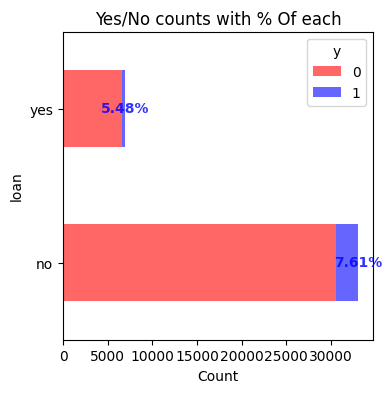

In [78]:
visualization.barh_pct(df=df, feature="loan", figsize=(4,4))

One hot encoding: 

In [79]:
cur_feat="loan"
ohencoder=OneHotEncoder(handle_unknown="ignore")
df_encoded=pd.DataFrame(
    ohencoder.fit_transform(X=df[[cur_feat]]).toarray(),
    columns=ohencoder.get_feature_names_out([cur_feat])
)
df_ready=pd.concat([df_ready,df_encoded],axis=1)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,default_no,default_yes,default_tar,balance_ready,balance_tar,housing_no,housing_yes,housing_tar,loan_no,loan_yes
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,7.264423,7.670475,9.597768,0.0,1.0,6.092131,1.0,0.0
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.264423,3.404525,5.423260,0.0,1.0,6.092131,1.0,0.0
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.264423,1.131402,5.575723,0.0,1.0,6.092131,0.0,1.0
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.264423,7.317943,7.965275,0.0,1.0,6.092131,1.0,0.0
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.264423,0.741937,5.683893,1.0,0.0,8.967374,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.264423,5.981667,6.878299,1.0,0.0,8.967374,1.0,0.0
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,7.264423,8.114055,13.699589,1.0,0.0,8.967374,1.0,0.0
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.264423,5.303802,6.261347,1.0,0.0,8.967374,1.0,0.0
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,7.264423,6.954734,7.757697,1.0,0.0,8.967374,1.0,0.0


Target later: 

In [80]:
cur_feat="loan"
tar=data_processing.get_pct_group_by(df=df[[cur_feat,"y"]],groupby=cur_feat)
df_ready[cur_feat+"_tar"]=data_processing.map_fill_fall_back(feature_arr=df[cur_feat].to_numpy(), cat_arr=tar[cur_feat].to_numpy(), val_arr=tar["y"].to_numpy(), fall_back=fall_back)
# df_ready["job_tar"]=df["job"].transform(lambda x: data_processing.safe_return(x, tar))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,default_yes,default_tar,balance_ready,balance_tar,housing_no,housing_yes,housing_tar,loan_no,loan_yes,loan_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,7.264423,7.670475,9.597768,0.0,1.0,6.092131,1.0,0.0,7.608104
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.264423,3.404525,5.423260,0.0,1.0,6.092131,1.0,0.0,7.608104
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,7.264423,1.131402,5.575723,0.0,1.0,6.092131,0.0,1.0,5.483405
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.264423,7.317943,7.965275,0.0,1.0,6.092131,1.0,0.0,7.608104
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.264423,0.741937,5.683893,1.0,0.0,8.967374,1.0,0.0,7.608104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.264423,5.981667,6.878299,1.0,0.0,8.967374,1.0,0.0,7.608104
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,7.264423,8.114055,13.699589,1.0,0.0,8.967374,1.0,0.0,7.608104
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.264423,5.303802,6.261347,1.0,0.0,8.967374,1.0,0.0,7.608104
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,7.264423,6.954734,7.757697,1.0,0.0,8.967374,1.0,0.0,7.608104


## Contact (categorical) 

In [81]:
df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

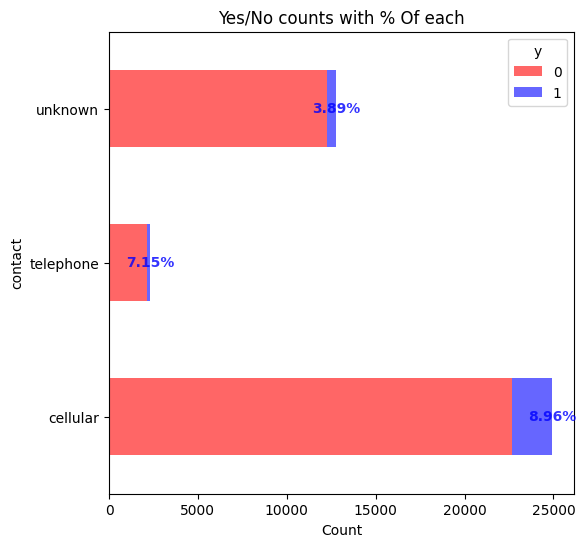

In [82]:
visualization.barh_pct(df=df, feature="contact", figsize=(6,6))

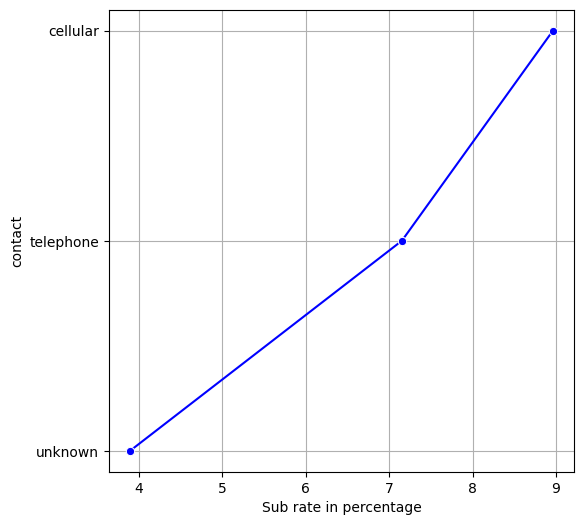

In [83]:
visualization.yes_pct(df=df, feature="contact", figsize=(6,6))

One hot Encoding: 

In [84]:
cur_feat="contact"
ohencoder=OneHotEncoder(handle_unknown="ignore")
df_encoded=pd.DataFrame(
    ohencoder.fit_transform(X=df[[cur_feat]]).toarray(),
    columns=ohencoder.get_feature_names_out([cur_feat])
)
df_ready=pd.concat([df_ready,df_encoded],axis=1)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,balance_tar,housing_no,housing_yes,housing_tar,loan_no,loan_yes,loan_tar,contact_cellular,contact_telephone,contact_unknown
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,9.597768,0.0,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.423260,0.0,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.575723,0.0,1.0,6.092131,0.0,1.0,5.483405,0.0,0.0,1.0
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7.965275,0.0,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.683893,1.0,0.0,8.967374,1.0,0.0,7.608104,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.878299,1.0,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,13.699589,1.0,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.261347,1.0,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.757697,1.0,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0


Target encoding later: 

In [85]:
cur_feat="contact"
tar=data_processing.get_pct_group_by(df=df[[cur_feat,"y"]],groupby=cur_feat)
df_ready[cur_feat+"_tar"]=data_processing.map_fill_fall_back(feature_arr=df[cur_feat].to_numpy(), cat_arr=tar[cur_feat].to_numpy(), val_arr=tar["y"].to_numpy(), fall_back=fall_back)
# df_ready["job_tar"]=df["job"].transform(lambda x: data_processing.safe_return(x, tar))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,housing_no,housing_yes,housing_tar,loan_no,loan_yes,loan_tar,contact_cellular,contact_telephone,contact_unknown,contact_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.092131,0.0,1.0,5.483405,0.0,0.0,1.0,3.893459
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,8.967374,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832


## Day (numeric) 

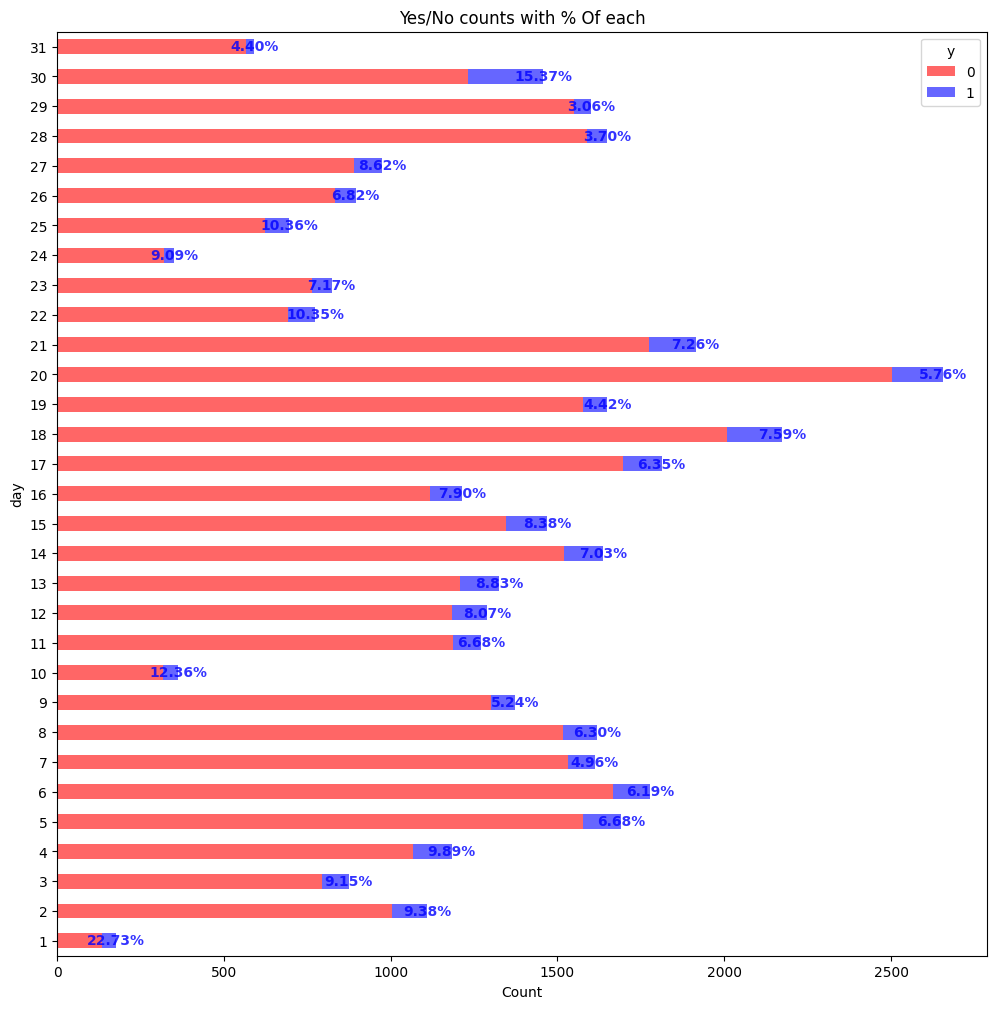

In [86]:
visualization.barh_pct(df=df, feature="day")

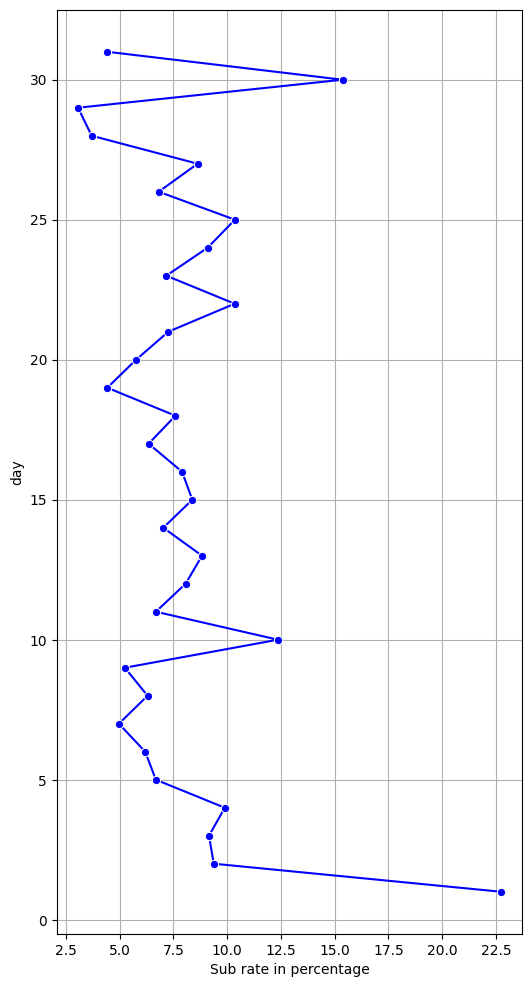

In [87]:
visualization.yes_pct(df=df,feature="day")

StandardScaler: 

In [89]:
df_ready["day_ready"]=df[["day"]]
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,housing_yes,housing_tar,loan_no,loan_yes,loan_tar,contact_cellular,contact_telephone,contact_unknown,contact_tar,day_ready
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,6.092131,0.0,1.0,5.483405,0.0,0.0,1.0,3.893459,5
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.967374,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3


Target? 

In [90]:
cur_feat="day"
df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready","y"]],groupby=cur_feat+"_ready")
df_ready[cur_feat+"_tar"]=data_processing.map_fill_w_knn(feature_arr=df_ready[cur_feat+"_ready"].to_numpy(), cat_arr=df_ready_feat[cur_feat+"_ready"].to_numpy(), val_arr=df_ready_feat["y"].to_numpy(), count_arr=np.log(df_ready_feat["count"].to_numpy()+1), cyc=True)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,housing_tar,loan_no,loan_yes,loan_tar,contact_cellular,contact_telephone,contact_unknown,contact_tar,day_ready,day_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5,7.319346
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5,7.319346
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,6.092131,0.0,1.0,5.483405,0.0,0.0,1.0,3.893459,5,7.319346
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,6.092131,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5,7.319346
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.967374,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5,7.319346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3,10.906423
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3,10.906423
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3,10.906423
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,8.967374,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3,10.906423


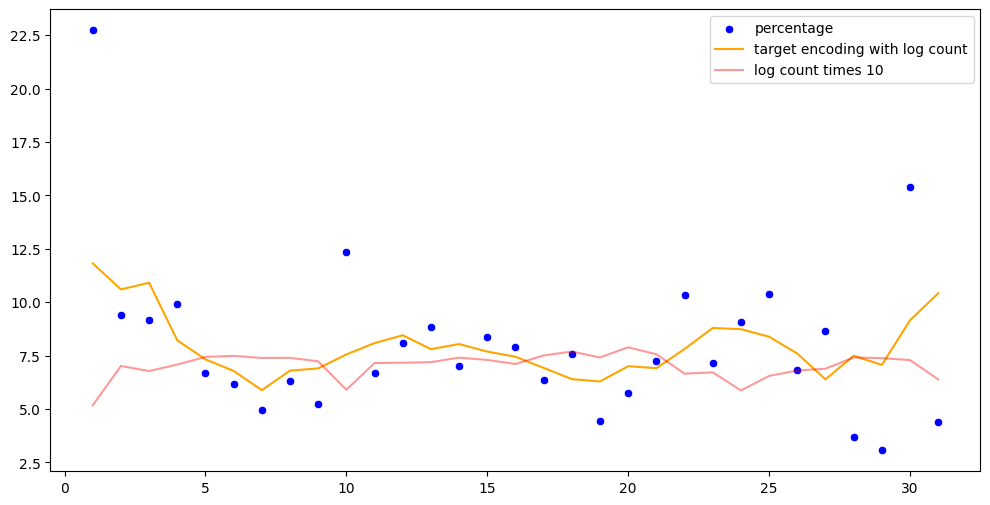

In [94]:
cur_feat="day"
# df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready", "y"]], groupby=cur_feat+"_ready")  #(df_ready.groupby(cur_feat+"_ready")["y"].mean()*100).reset_index()
df_ready_feat=df_ready_feat.merge(right=df_ready[[cur_feat+"_ready",cur_feat+"_tar"]], left_on=cur_feat+"_ready", right_on=cur_feat+"_ready", how="left").drop_duplicates()
# df_ready_feat
# cur_feat="balance"
fig, ax=plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=df_ready_feat[cur_feat+"_ready"].values, y=df_ready_feat["y"].values, color="blue", markers=True, label="percentage", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat+"_ready"].values, y=df_ready_feat[cur_feat+"_tar"].values, color="orange", markers=True, label="target encoding with log count", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat+"_ready"].values, y=np.log(df_ready_feat["count"].values), color="red", markers=True, label="log count times 10", ax=ax, alpha=0.4)
plt.show()

Bonus: maybe bin it? 

## Month (categorical, ordinal) 

In [95]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [96]:
df["month_num"]=df["month"].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12})

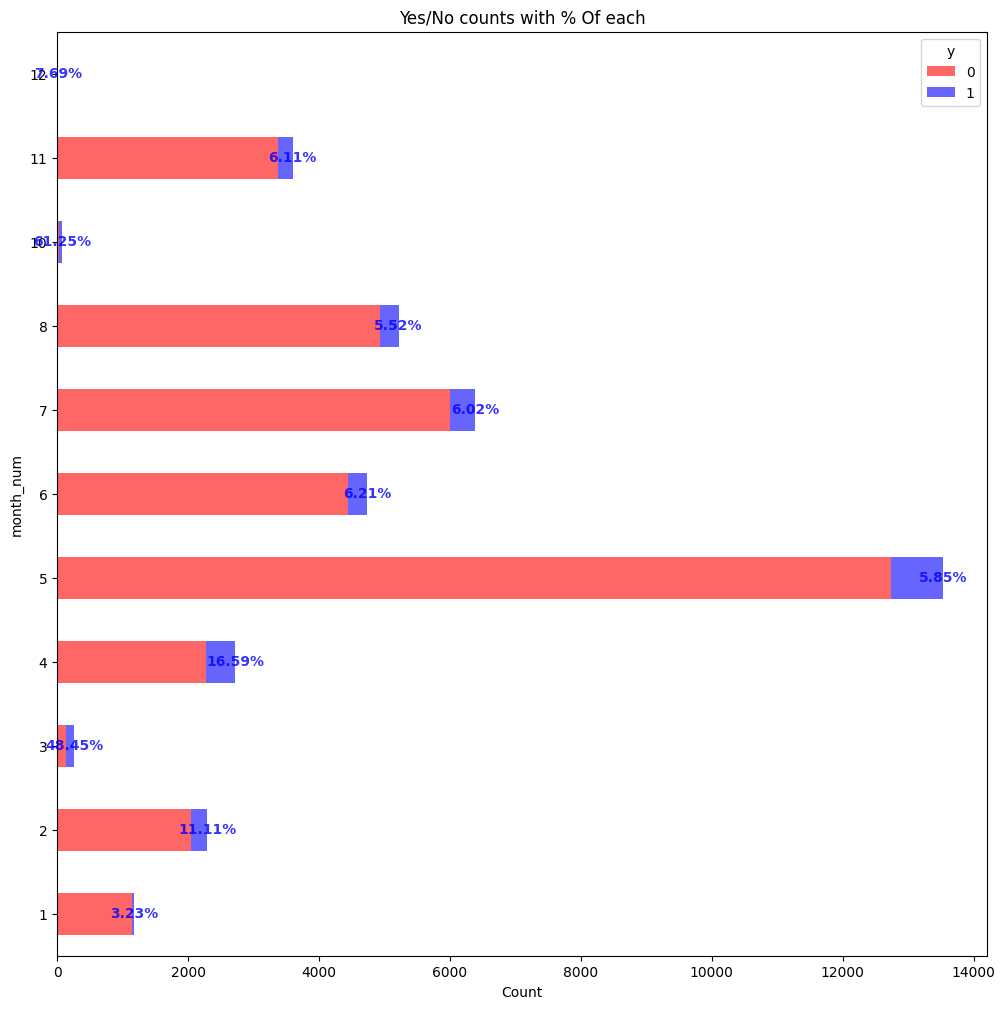

In [97]:
visualization.barh_pct(df=df, feature="month_num")

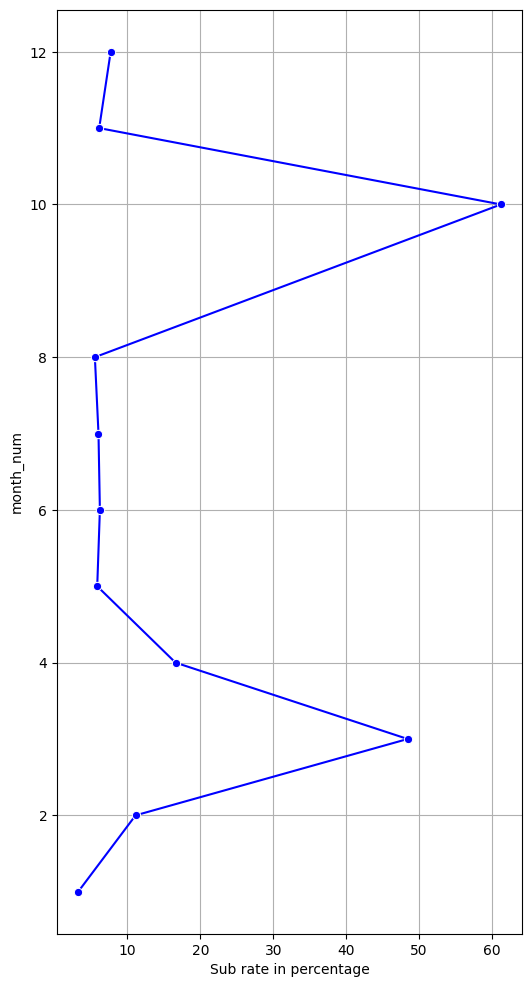

In [98]:
visualization.yes_pct(df=df, feature="month_num")

One hot: 

In [99]:
df_ready["month_num"]=df["month_num"]
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,loan_no,loan_yes,loan_tar,contact_cellular,contact_telephone,contact_unknown,contact_tar,day_ready,day_tar,month_num
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5,7.319346,5
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5,7.319346,5
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.483405,0.0,0.0,1.0,3.893459,5,7.319346,5
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5,7.319346,5
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.608104,0.0,0.0,1.0,3.893459,5,7.319346,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3,10.906423,6
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3,10.906423,6
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3,10.906423,6
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,7.608104,1.0,0.0,0.0,8.962832,3,10.906423,6


In [100]:
cur_feat="month_num"
ohencoder=OneHotEncoder(handle_unknown="ignore")
df_encoded=pd.DataFrame(
    ohencoder.fit_transform(X=df[[cur_feat]]).toarray(),
    columns=ohencoder.get_feature_names_out([cur_feat])
)
df_ready=pd.concat([df_ready,df_encoded],axis=1)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_num_2,month_num_3,month_num_4,month_num_5,month_num_6,month_num_7,month_num_8,month_num_10,month_num_11,month_num_12
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Target: 

In [131]:
cur_feat="month_num"
df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat,"y"]],groupby=cur_feat)
df_ready[cur_feat+"_tar"]=data_processing.map_fill_w_knn(feature_arr=df_ready[cur_feat].to_numpy(), cat_arr=df_ready_feat[cur_feat].to_numpy(), val_arr=df_ready_feat["y"].to_numpy(), count_arr=np.log(df_ready_feat["count"].to_numpy()+1), cyc=True)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_num_5,month_num_6,month_num_7,month_num_8,month_num_10,month_num_11,month_num_12,month_num_tar,day_of_year,day_of_year_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876


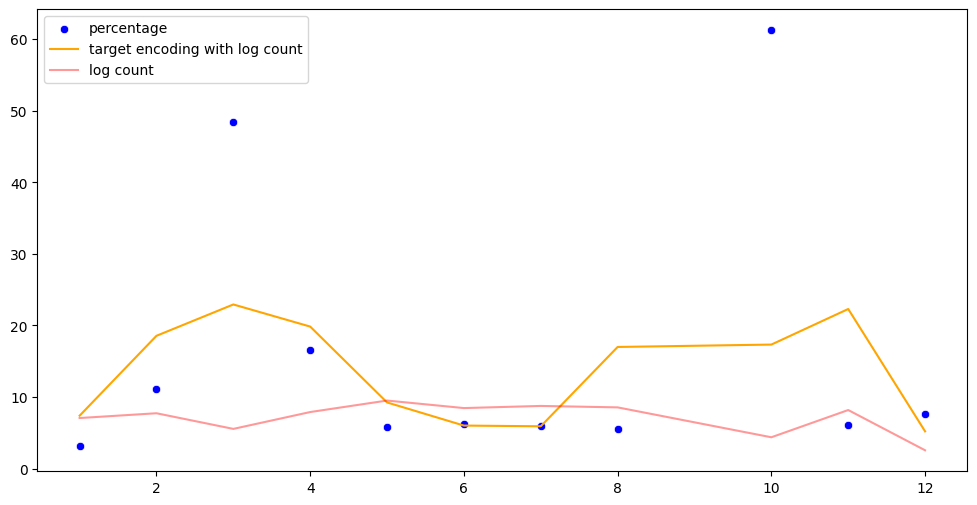

In [132]:
cur_feat="month_num"
# df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready", "y"]], groupby=cur_feat+"_ready")  #(df_ready.groupby(cur_feat+"_ready")["y"].mean()*100).reset_index()
df_ready_feat=df_ready_feat.merge(right=df_ready[[cur_feat,cur_feat+"_tar"]], left_on=cur_feat, right_on=cur_feat, how="left").drop_duplicates()
# df_ready_feat
# cur_feat="balance"
fig, ax=plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=df_ready_feat[cur_feat].values, y=df_ready_feat["y"].values, color="blue", markers=True, label="percentage", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat].values, y=df_ready_feat[cur_feat+"_tar"].values, color="orange", markers=True, label="target encoding with log count", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat].values, y=np.log(df_ready_feat["count"].values), color="red", markers=True, label="log count", ax=ax, alpha=0.4)
plt.show()

Bonus: Ont hot with "Oct", "Mar", "Apr", and "O.W.": 

## Bonus: Month-Day (date-time)

The data, does not have Feb 29, so we can assume we are only considering a non-leap year. 

In [105]:
df[(df["month"]=="feb")&(df["day"]==29)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,month_num


Be hold, following function that returns the day of the year as an integer. 

In [112]:
data_processing.day_of_non_leap(month="jun",day=6) #This is too slow, use the vectorize version for enmass data engineering. 

157

In [107]:
df["day_of_year"]=data_processing.day_of_non_leap_np(month_arr=df["month_num"].to_numpy(),day_arr=df["day"].to_numpy())
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,month_num,day_of_year
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,5,125
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,5,125
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,5,125
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,5,125
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,5,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,0,6,154
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,1,6,154
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,1,6,154
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,0,6,154


In [113]:
df["day_of_year"].unique()

array([125, 126, 127, 128, 129, 132, 133, 134, 135, 136, 139, 140, 141,
       143, 146, 147, 148, 149, 150, 153, 154, 155, 156, 157, 160, 162,
       163, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 181, 182,
       183, 184, 185, 188, 189, 190, 191, 192, 195, 196, 197, 198, 199,
       202, 203, 204, 205, 206, 209, 210, 211, 212, 216, 217, 218, 219,
       220, 223, 224, 225, 226, 230, 231, 232, 233, 234, 237, 238, 239,
       240, 241, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 308, 309, 310, 312, 313, 314, 315, 316, 317,
       318, 321, 322, 323, 324, 325, 326, 331, 338, 339, 341, 342, 343,
       345, 346, 347, 356, 361,  28,  29,  30,  33,  34,  35,  36,  37,
        40,  41,  42,  43,  44,  47,  48,  49,  50,  57,  58,  61,  62,
        63,  64,  65,  68,  69,  70,  71,  72,  75,  76,  77,  78,  79,
        82,  83,  84,  85,  86,  89,  90,  91,  92,  93,  96,  97,  98,
        99, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 11

In [114]:
len(df["day_of_year"].unique())

190

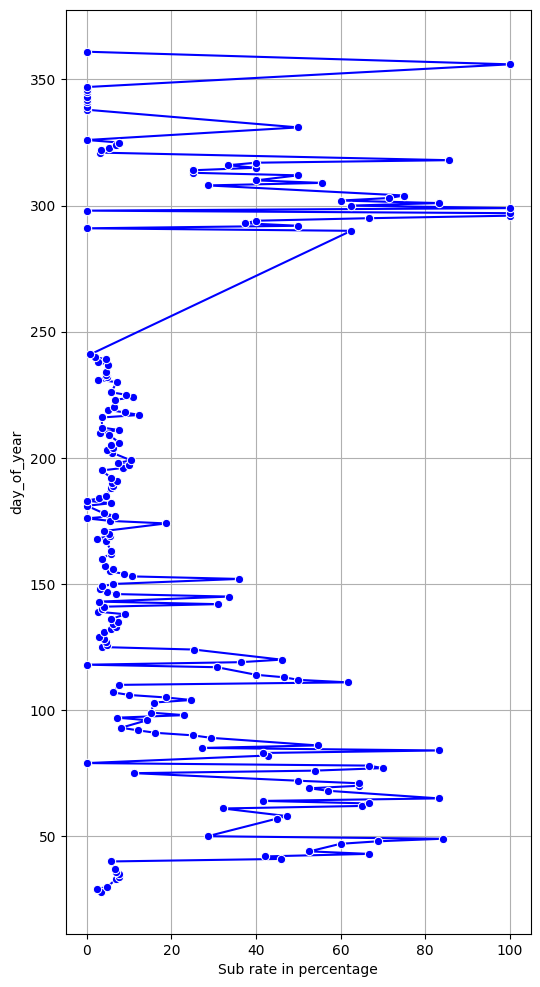

In [115]:
visualization.yes_pct(df=df, feature="day_of_year")

What does this tell me? The high rates happen in "cluster", it also looks like anything between day 160 to 250 are practically useless work, while any other time (the start and the end of the year) are much more productive. I would now consider "day" column not as important as "month" feature. 

Let's take a look at day == 1: 

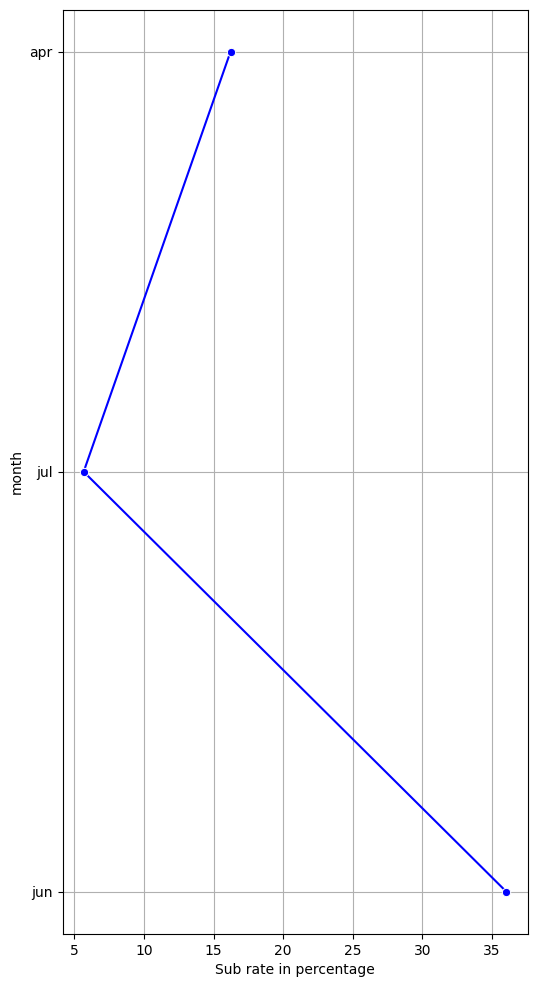

In [141]:
visualization.yes_pct(df=df[df["day"]==1], feature="month")

day==10: 

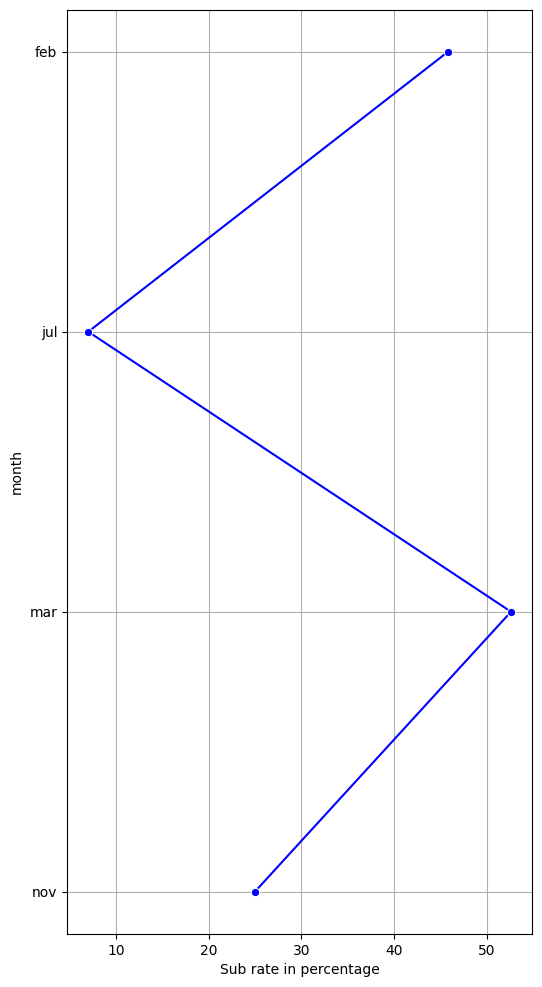

In [142]:
visualization.yes_pct(df=df[df["day"]==10], feature="month")

day==30

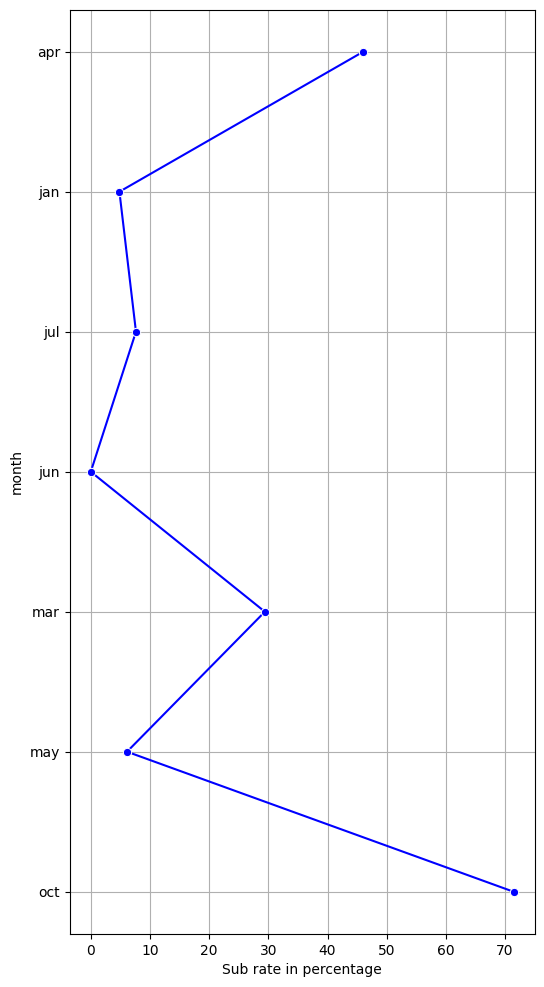

In [143]:
visualization.yes_pct(df=df[df["day"]==30], feature="month")

I kinda now think day feature might be a noisy. 

Target encoding: 

In [118]:
df_ready["day_of_year"]=df["day_of_year"]
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_num_4,month_num_5,month_num_6,month_num_7,month_num_8,month_num_10,month_num_11,month_num_12,month_num_tar,day_of_year
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154


In [119]:
cur_feat="day_of_year"
df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat,"y"]],groupby=cur_feat)
df_ready[cur_feat+"_tar"]=data_processing.map_fill_w_knn(feature_arr=df_ready[cur_feat].to_numpy(), cat_arr=df_ready_feat[cur_feat].to_numpy(), val_arr=df_ready_feat["y"].to_numpy(), count_arr=np.log(df_ready_feat["count"].to_numpy()+1), cyc=True)
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_num_5,month_num_6,month_num_7,month_num_8,month_num_10,month_num_11,month_num_12,month_num_tar,day_of_year,day_of_year_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876


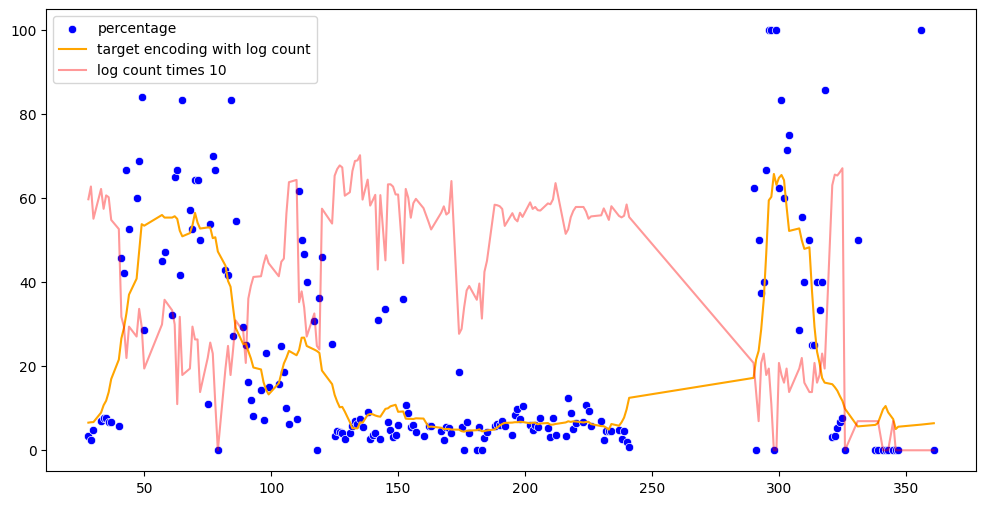

In [122]:
cur_feat="day_of_year"
# df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready", "y"]], groupby=cur_feat+"_ready")  #(df_ready.groupby(cur_feat+"_ready")["y"].mean()*100).reset_index()
df_ready_feat=df_ready_feat.merge(right=df_ready[[cur_feat,cur_feat+"_tar"]], left_on=cur_feat, right_on=cur_feat, how="left").drop_duplicates()
# df_ready_feat
# cur_feat="balance"
fig, ax=plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=df_ready_feat[cur_feat].values, y=df_ready_feat["y"].values, color="blue", markers=True, label="percentage", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat].values, y=df_ready_feat[cur_feat+"_tar"].values, color="orange", markers=True, label="target encoding with log count", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat].values, y=np.log(df_ready_feat["count"].values)*10, color="red", markers=True, label="log count times 10", ax=ax, alpha=0.4)
plt.show()

## Duration (numeric) 

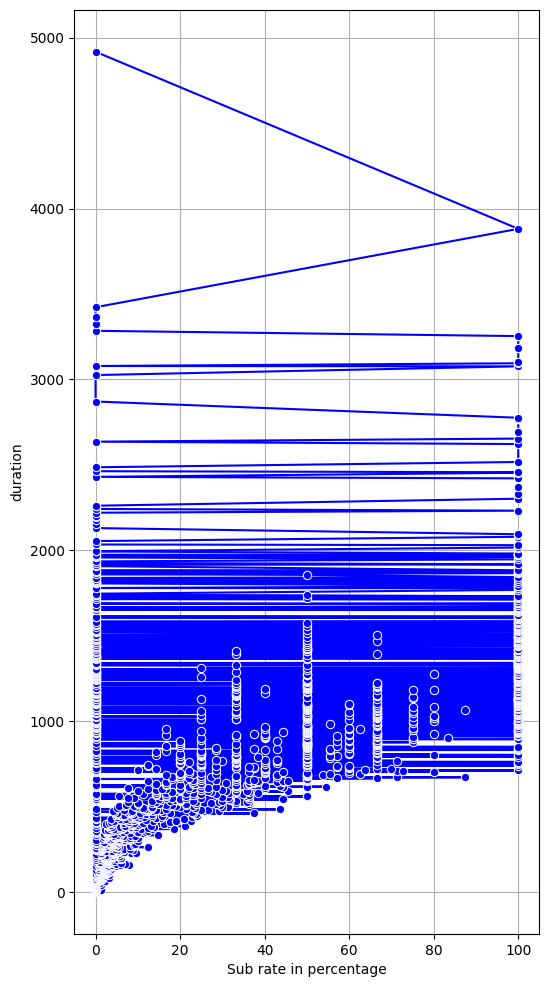

In [133]:
visualization.yes_pct(df=df, feature="duration")

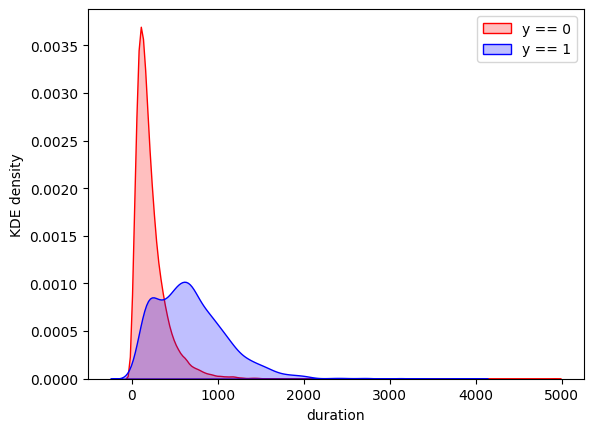

In [134]:
visualization.sns_kde(df=df, feature="duration")

Again, long tail, at least I do not have to be careful about negative values now. Here goes the log: 

In [144]:
# scaler=StandardScaler()

df_ready["duration_ready"]=pd.DataFrame({"duration": np.log(df["duration"]+1)})
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_num_7,month_num_8,month_num_10,month_num_11,month_num_12,month_num_tar,day_of_year,day_of_year_tar,duration_ready,duration_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.568345,3.994450
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.023881,2.667762
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,4.343805,0.718313
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,4.532599,1.120063
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.293305,2.729112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876,4.682131,1.559663
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.476464,3.827409
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.141664,2.723738
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.837730,5.335033


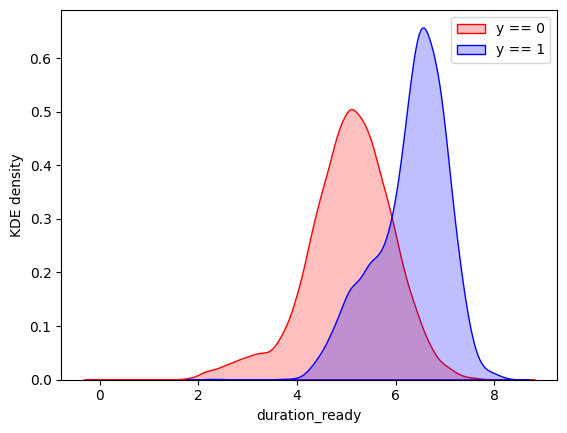

In [145]:
visualization.sns_kde(df=df_ready,feature="duration_ready")

Much better. 

Bonus: Binning "Under 10000", "between 10000 and 20000", "between 20000 and 30000", "between 30000 and 40000", and "40000 and up". 

Target encoding: 

In [146]:
cur_feat="duration"
df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready","y"]],groupby=cur_feat+"_ready")
df_ready[cur_feat+"_tar"]=data_processing.map_fill_w_knn(feature_arr=df_ready[cur_feat+"_ready"].to_numpy(), cat_arr=df_ready_feat[cur_feat+"_ready"].to_numpy(), val_arr=df_ready_feat["y"].to_numpy(), count_arr=np.log(df_ready_feat["count"].to_numpy()+1))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_num_7,month_num_8,month_num_10,month_num_11,month_num_12,month_num_tar,day_of_year,day_of_year_tar,duration_ready,duration_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.568345,3.994450
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.023881,2.667762
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,4.343805,0.718313
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,4.532599,1.120063
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.293305,2.729112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876,4.682131,1.559663
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.476464,3.827409
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.141664,2.723738
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.837730,5.335033


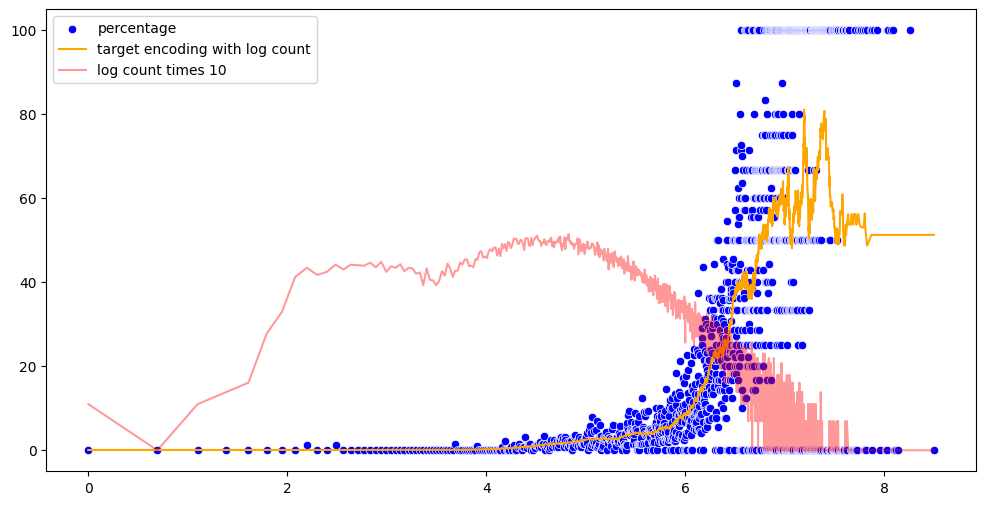

In [147]:
cur_feat="duration"
# df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready", "y"]], groupby=cur_feat+"_ready")  #(df_ready.groupby(cur_feat+"_ready")["y"].mean()*100).reset_index()
df_ready_feat=df_ready_feat.merge(right=df_ready[[cur_feat+"_ready",cur_feat+"_tar"]], left_on=cur_feat+"_ready", right_on=cur_feat+"_ready", how="left").drop_duplicates()
# df_ready_feat
# cur_feat="balance"
fig, ax=plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=df_ready_feat[cur_feat+"_ready"].values, y=df_ready_feat["y"].values, color="blue", markers=True, label="percentage", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat+"_ready"].values, y=df_ready_feat[cur_feat+"_tar"].values, color="orange", markers=True, label="target encoding with log count", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat+"_ready"].values, y=np.log(df_ready_feat["count"].values)*10, color="red", markers=True, label="log count times 10", ax=ax, alpha=0.4)
plt.show()

## Campaign (numeric) 

In [140]:
df["campaign"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

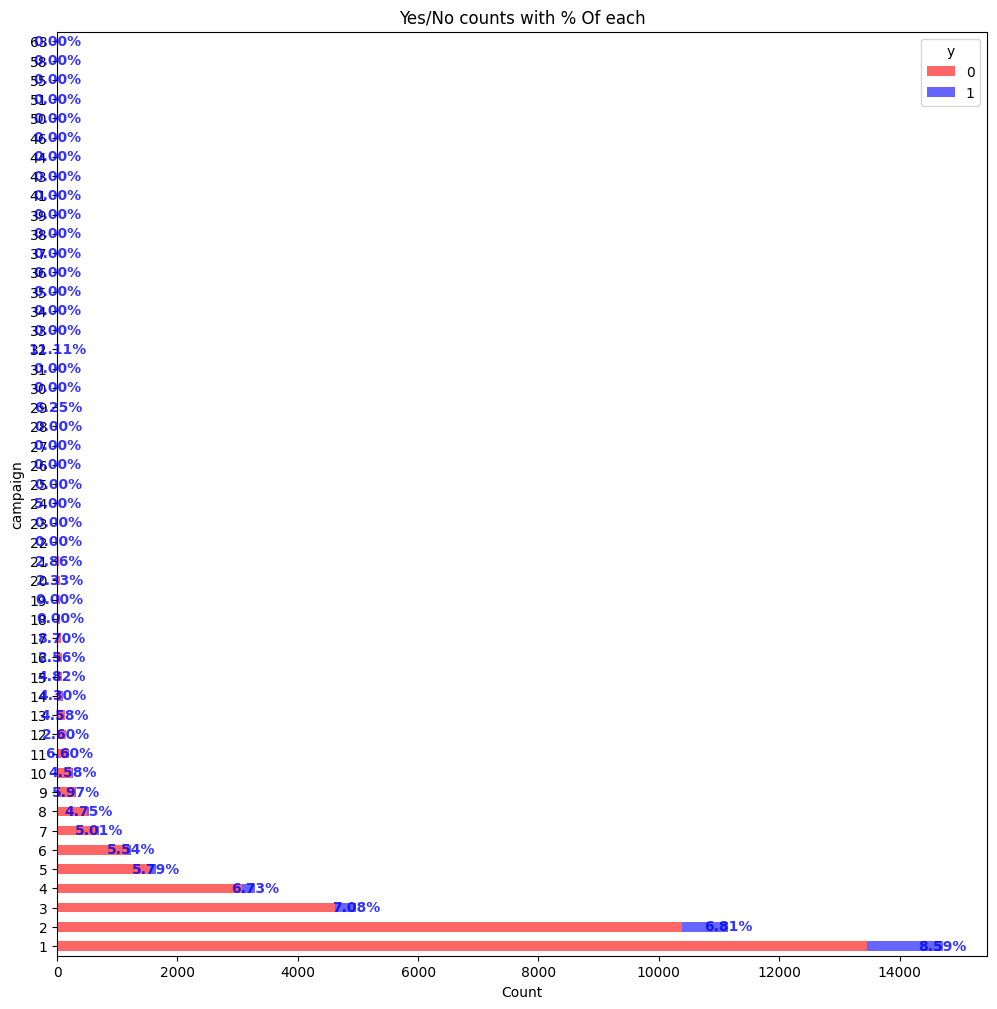

In [141]:
visualization.barh_pct(df=df, feature="campaign")

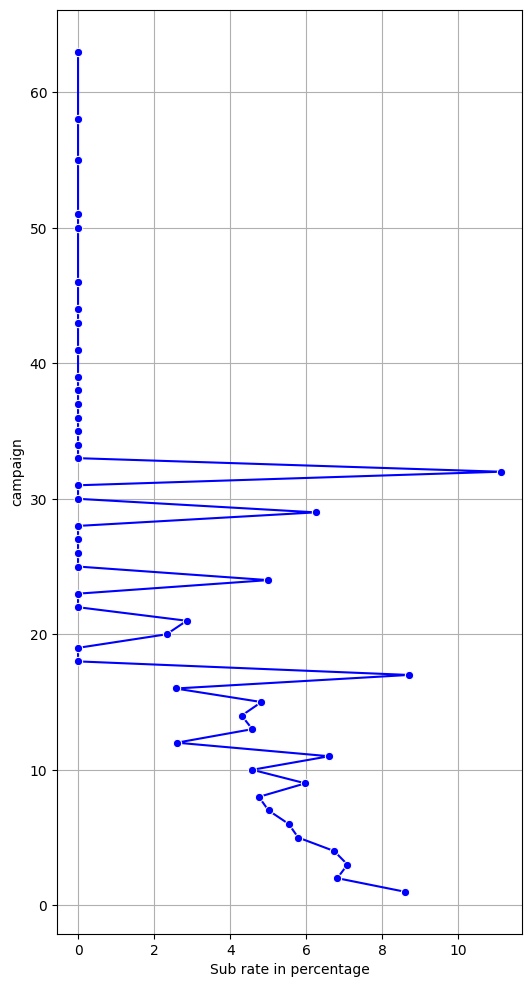

In [142]:
visualization.yes_pct(df=df, feature="campaign")

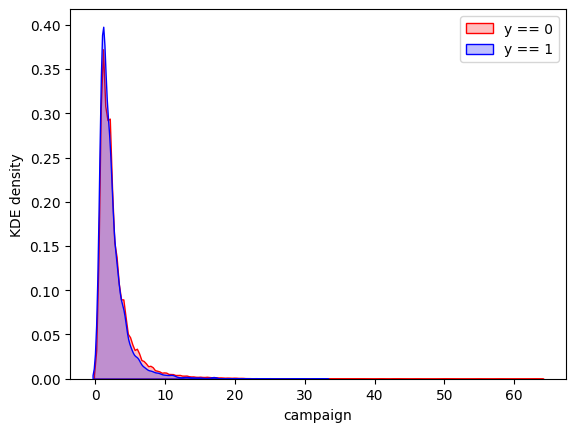

In [143]:
visualization.sns_kde(df=df, feature="campaign")

I do not really see distinctions, but I should try to do log again. 

In [156]:
# scaler=StandardScaler()

df_ready["campaign_ready"]=pd.DataFrame({"campaign": np.log(df["campaign"]+1)})
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_num_8,month_num_10,month_num_11,month_num_12,month_num_tar,day_of_year,day_of_year_tar,duration_ready,duration_tar,campaign_ready
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.568345,3.994450,0.693147
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.023881,2.667762,0.693147
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.248389,125,13.196373,4.343805,0.718313,0.693147
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.248389,125,13.196373,4.532599,1.120063,0.693147
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.248389,125,13.196373,5.293305,2.729112,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.017752,154,7.475876,4.682131,1.559663,0.693147
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.476464,3.827409,1.386294
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.141664,2.723738,0.693147
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.017752,154,7.475876,5.837730,5.335033,0.693147


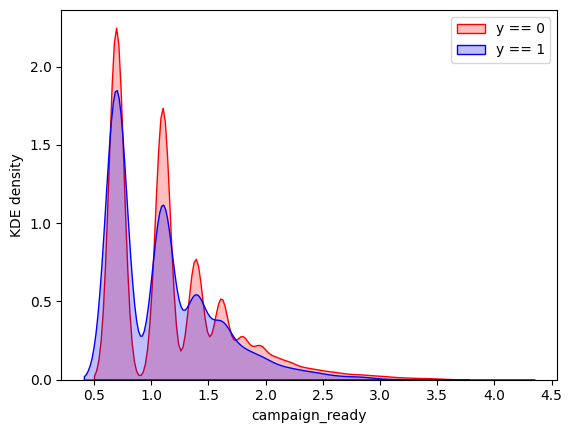

In [157]:
visualization.sns_kde(df=df_ready, feature="campaign_ready")

I do not think this feature can help on its own. 

Bonus: Binning "under 10", "between 10 and 20", "between 20 and 35", "above 35": 

Target encoding: 

In [158]:
cur_feat="campaign"
df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready","y"]],groupby=cur_feat+"_ready")
df_ready[cur_feat+"_tar"]=data_processing.map_fill_w_knn(feature_arr=df_ready[cur_feat+"_ready"].to_numpy(), cat_arr=df_ready_feat[cur_feat+"_ready"].to_numpy(), val_arr=df_ready_feat["y"].to_numpy(), count_arr=np.log(df_ready_feat["count"].to_numpy()+1))
df_ready

,y,age,age_tar,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_num_10,month_num_11,month_num_12,month_num_tar,day_of_year,day_of_year_tar,duration_ready,duration_tar,campaign_ready,campaign_tar
0,0,58,7.659174,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,9.248389,125,13.196373,5.568345,3.994450,0.693147,6.853275
1,0,44,6.252218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.248389,125,13.196373,5.023881,2.667762,0.693147,6.853275
2,0,33,7.665756,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.248389,125,13.196373,4.343805,0.718313,0.693147,6.853275
3,0,47,5.969079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.248389,125,13.196373,4.532599,1.120063,0.693147,6.853275
4,0,33,7.665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.248389,125,13.196373,5.293305,2.729112,0.693147,6.853275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,5.766354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.017752,154,7.475876,4.682131,1.559663,0.693147,6.853275
39996,1,30,8.872931,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,6.017752,154,7.475876,5.476464,3.827409,1.386294,6.853275
39997,1,54,5.552559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.017752,154,7.475876,5.141664,2.723738,0.693147,6.853275
39998,0,34,7.268098,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,6.017752,154,7.475876,5.837730,5.335033,0.693147,6.853275


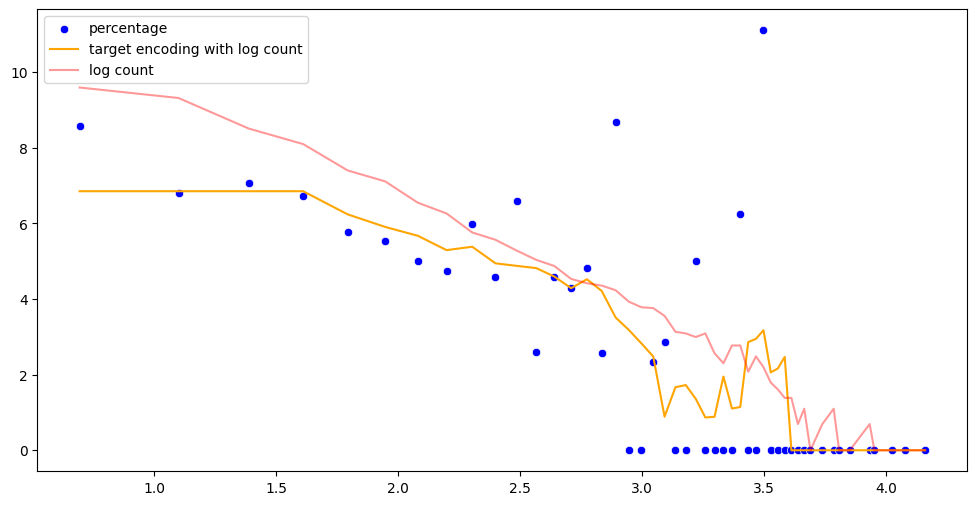

In [161]:
cur_feat="campaign"
# df_ready_feat=data_processing.get_pct_group_by(df=df_ready[[cur_feat+"_ready", "y"]], groupby=cur_feat+"_ready")  #(df_ready.groupby(cur_feat+"_ready")["y"].mean()*100).reset_index()
df_ready_feat=df_ready_feat.merge(right=df_ready[[cur_feat+"_ready",cur_feat+"_tar"]], left_on=cur_feat+"_ready", right_on=cur_feat+"_ready", how="left").drop_duplicates()
# df_ready_feat
# cur_feat="balance"
fig, ax=plt.subplots(1,1, figsize=(12,6))
sns.scatterplot(x=df_ready_feat[cur_feat+"_ready"].values, y=df_ready_feat["y"].values, color="blue", markers=True, label="percentage", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat+"_ready"].values, y=df_ready_feat[cur_feat+"_tar"].values, color="orange", markers=True, label="target encoding with log count", ax=ax)
sns.lineplot(x=df_ready_feat[cur_feat+"_ready"].values, y=np.log(df_ready_feat["count"].values), color="red", markers=True, label="log count", ax=ax, alpha=0.4)
plt.show()

## Bonus: Duration/Campaign: 

In [43]:
df["dur_per_cam"]=df["duration"]/df["campaign"]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,dur_per_cam
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,261.000000
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,151.000000
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,76.000000
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,92.000000
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,198.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,0,107.000000
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,1,79.333333
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,1,170.000000
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,0,342.000000


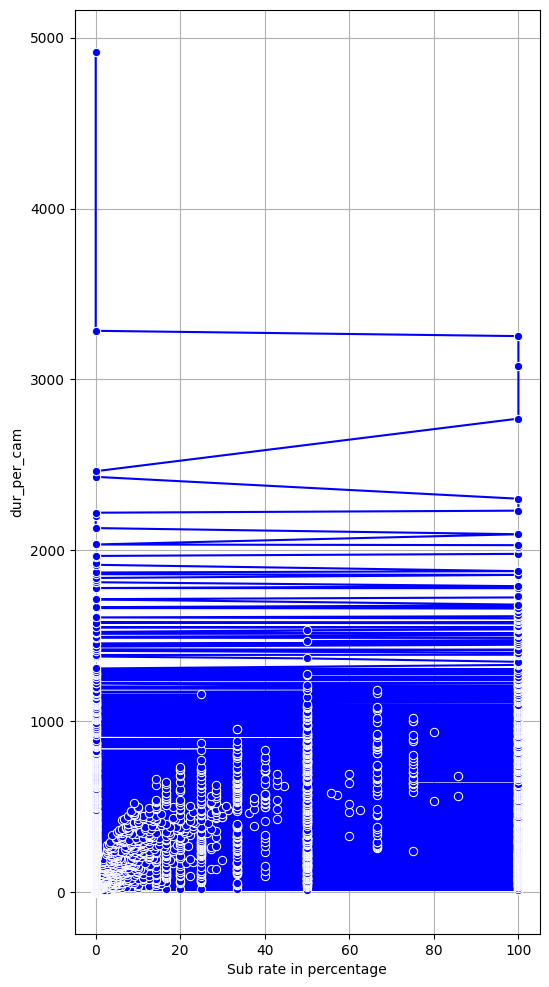

In [47]:
visualization.yes_pct(df=df, feature="dur_per_cam")

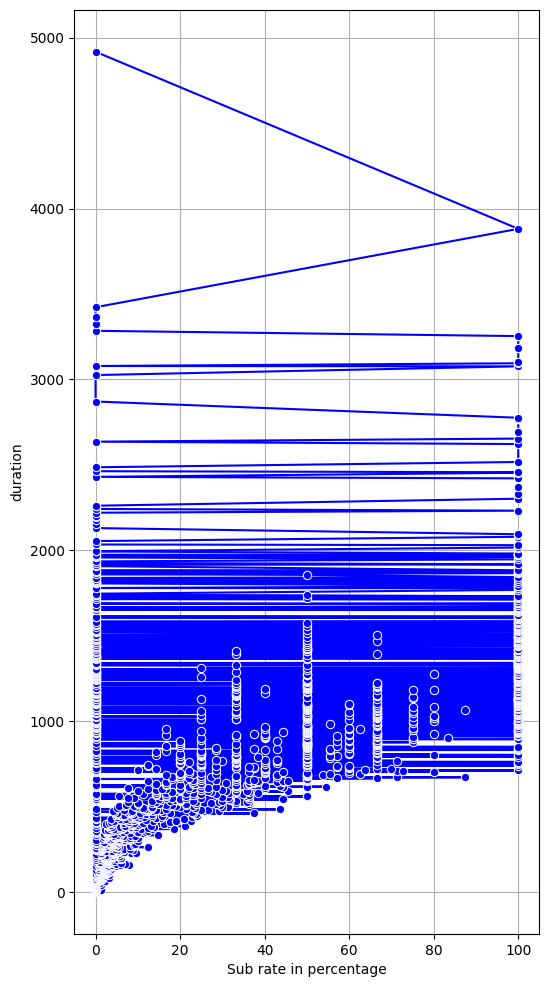

In [48]:
visualization.yes_pct(df=df, feature="duration")

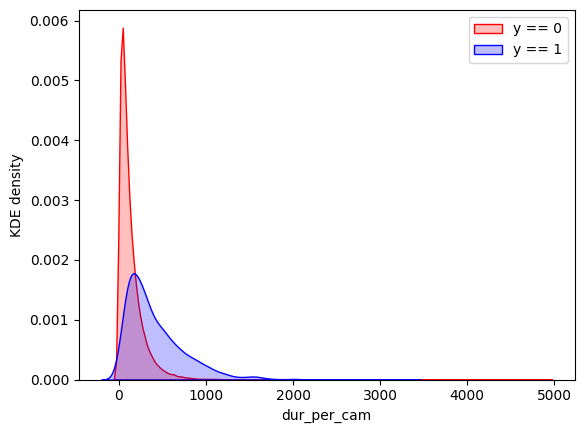

In [44]:
visualization.sns_kde(df=df, feature="dur_per_cam")

In [45]:
scaler=StandardScaler()

df_ready["dur_per_cam_ready"]=scaler.fit_transform(pd.DataFrame({"dur_per_cam": np.log(df["dur_per_cam"]+1)}))
df_ready

,y,age,job_oh__admin,job_oh__blue-collar,job_oh__entrepreneur,job_oh__housemaid,job_oh__management,job_oh__retired,job_oh__self-employed,job_oh__services,...,month_oh__jul,month_oh__jun,month_oh__mar,month_oh__may,month_oh__nov,month_oh__oct,month_tar,duration_ready,compaign_ready,dur_per_cam_ready
0,0,1.810415,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,5.845403,0.452039,-0.935500,0.929553
1,0,0.358382,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,5.845403,-0.134814,-0.935500,0.483589
2,0,-0.782501,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,5.845403,-0.867837,-0.935500,-0.073453
3,0,0.669532,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,5.845403,-0.664344,-0.935500,0.081186
4,0,-0.782501,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,5.845403,0.155586,-0.935500,0.704271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1.291832,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,6.210393,-0.503170,-0.935500,0.203666
39996,1,-1.093650,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,6.210393,0.353005,0.388974,-0.038740
39997,1,1.395549,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,6.210393,-0.007861,-0.935500,0.580063
39998,0,-0.678784,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,6.210393,0.742398,-0.935500,1.150203


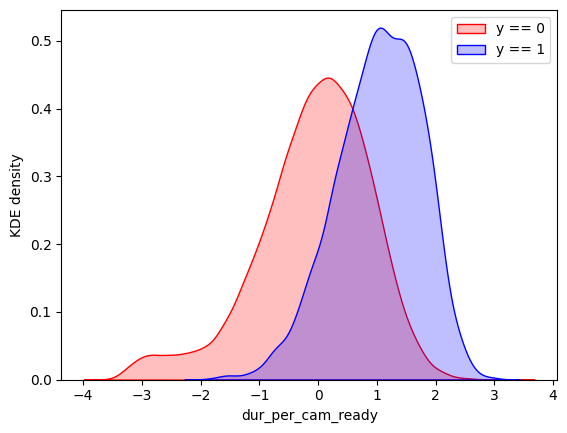

In [46]:
visualization.sns_kde(df=df_ready, feature="dur_per_cam_ready")

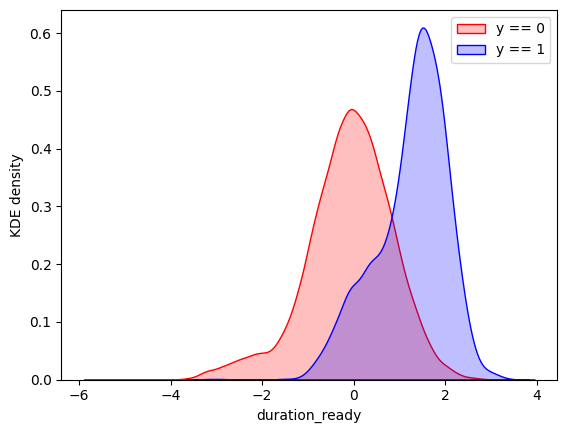

In [49]:
visualization.sns_kde(df=df_ready, feature="duration_ready")

Might help might not. Seemingly the division have "reduced" the between variance, how about I multiply instead of divide? 

## Bonus: Duration * Campaign: 

In [50]:
df["dur_time_cam"]=df["duration"]*df["campaign"]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,dur_per_cam,dur_time_cam
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,261.000000,261
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,151.000000,151
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,76.000000,76
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,92.000000,92
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,198.000000,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,0,107.000000,107
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,1,79.333333,714
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,1,170.000000,170
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,0,342.000000,342


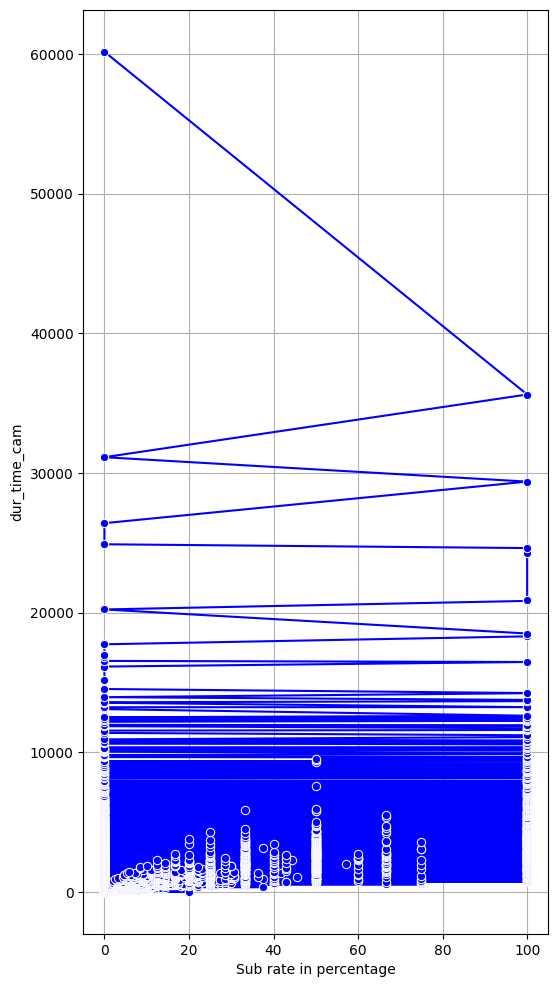

In [51]:
visualization.yes_pct(df=df, feature="dur_time_cam")

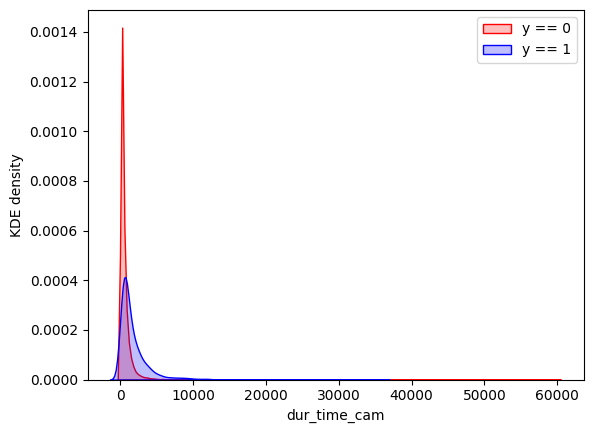

In [52]:
visualization.sns_kde(df=df, feature="dur_time_cam")

In [53]:
scaler=StandardScaler()

df_ready["dur_time_cam_ready"]=scaler.fit_transform(pd.DataFrame({"dur_time_cam": np.log(df["dur_time_cam"]+1)}))
df_ready

,y,age,job_oh__admin,job_oh__blue-collar,job_oh__entrepreneur,job_oh__housemaid,job_oh__management,job_oh__retired,job_oh__self-employed,job_oh__services,...,month_oh__jun,month_oh__mar,month_oh__may,month_oh__nov,month_oh__oct,month_tar,duration_ready,compaign_ready,dur_per_cam_ready,dur_time_cam_ready
0,0,1.810415,False,False,False,False,True,False,False,False,...,False,False,True,False,False,5.845403,0.452039,-0.935500,0.929553,-0.296063
1,0,0.358382,False,False,False,False,False,False,False,False,...,False,False,True,False,False,5.845403,-0.134814,-0.935500,0.483589,-0.804993
2,0,-0.782501,False,False,True,False,False,False,False,False,...,False,False,True,False,False,5.845403,-0.867837,-0.935500,-0.073453,-1.440685
3,0,0.669532,False,True,False,False,False,False,False,False,...,False,False,True,False,False,5.845403,-0.664344,-0.935500,0.081186,-1.264212
4,0,-0.782501,False,False,False,False,False,False,False,False,...,False,False,True,False,False,5.845403,0.155586,-0.935500,0.704271,-0.553152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1.291832,False,False,False,False,False,False,False,False,...,True,False,False,False,False,6.210393,-0.503170,-0.935500,0.203666,-1.124439
39996,1,-1.093650,False,False,False,False,True,False,False,False,...,True,False,False,False,False,6.210393,0.353005,0.388974,-0.038740,0.642355
39997,1,1.395549,True,False,False,False,False,False,False,False,...,True,False,False,False,False,6.210393,-0.007861,-0.935500,0.580063,-0.694897
39998,0,-0.678784,False,False,False,False,True,False,False,False,...,True,False,False,False,False,6.210393,0.742398,-0.935500,1.150203,-0.044258


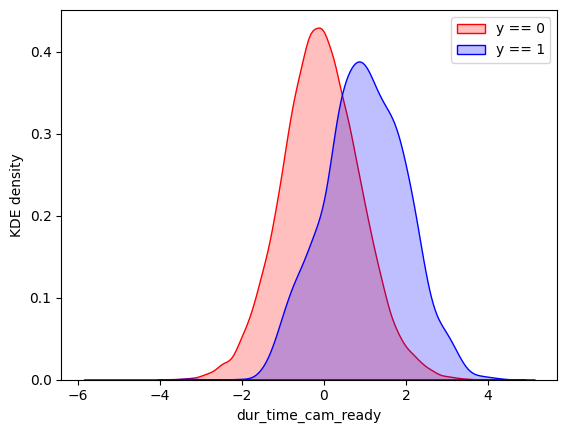

In [54]:
visualization.sns_kde(df=df_ready, feature="dur_time_cam_ready")

Sad, did not help. 